# import Libraries 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import precision_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read Data

In [47]:
data = pd.read_csv(r"E:\cources\Ai &DS Diploma\Ass\ass9\Bank.csv")

In [48]:
bank=data.copy()

# EDA

In [49]:
bank.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,53,technician,married,unknown,no,no,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,28,management,single,university.degree,no,yes,no,cellular,jun,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,39,services,married,high.school,no,no,no,cellular,apr,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,55,retired,married,basic.4y,no,yes,no,cellular,aug,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [50]:
bank.shape

(41188, 22)

In [51]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      41188 non-null  int64  
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41188 non-null  object 
 4   education       41188 non-null  object 
 5   default         41188 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41188 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  duration        41188 non-null  int64  
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41188 non-null  object 
 16  emp_var_rate    41188 non-null  float64
 17  cons_price_idx  41188 non-null 

**Data infomation**
- 1-The dataset consists of 41188 entries and 22 columns
- 2-'Unnamed: 0'This column appears to be an index or an unnecessary identifier it can likely be dropped from the dataset.
- 3-there is no null values
- 4-data is mix between int , float and objects

In [52]:
bank.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,41188.0,NaN,NaN,NaN,20593.5,11890.09578,0.0,10296.75,20593.5,30890.25,41187.0
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Summary Statistics**

- **'Unnamed: 0'**:  
  This column seems to act as an index or identifier. It is sequential (min: 0, max: 41187) and contains no unique information.

- **'Age'**:  
  The average age of individuals is around 40 years. The minimum age is 17, and the maximum is 98.

- **'Job'**:  
  There are 12 unique job types, with the most common being "admin." (10,422 occurrences).

- **'Marital Status'**:  
  There are 4 marital statuses, with "married" being the most frequent (24,928 occurrences).

- **'Education'**:  
  There are 8 unique education levels, with "university degree" being the most common (12,168 occurrences).

- **'Default'**:  
  There are 3 categories for default, with "no" being the most frequent (32,588 occurrences), meaning most individuals do not have credit in default.

- **'Housing'**:  
  This column indicates whether individuals have a housing loan. A total of 21,576 individuals responded "yes."

- **'Loan'**:  
  The majority of individuals (33,950) do not have a personal loan, indicating personal loans are less common in this dataset.

- **'Contact'**:  
  There are two types of contact methods, with "cellular" being the most frequent (26,144 occurrences).

- **'Month'**:  
  Contacts were made in 10 different months, with "May" being the most common month (13,769 occurrences), suggesting a seasonal pattern in interactions.

- **'Day of the Week'**:  
  Contacts were distributed across 5 days, with Thursday ("thu") being the most common (8,623 occurrences).

- **'Duration'**:  
  The average duration of contacts is 258 seconds (around 4.3 minutes).

- **'Campaign'**:  
  On average, individuals were contacted 2.57 times, but most received between 1 and 3 contacts.

- **'Pdays'**:  
  This column shows the number of days since the individual was last contacted. The value 999 (meaning the person was not previously contacted) is prevalent.

- **'Previous'**:  
  The majority of individuals (75%) had not been contacted previously, as shown by the median value of 0. Only a small proportion had up to 7 previous contacts.

- **'Poutcome'**:  
  There are 3 outcomes from previous campaigns, with "nonexistent" being the most common (35,563 instances). This aligns with the high number of individuals who had not been contacted before.

- **'Emp_var_rate' (Employment Variation Rate)**:  
  The mean is 0.08 with a wide range from -3.4 to 1.4, indicating fluctuating employment conditions.

- **'Cons_price_idx' (Consumer Price Index)**:  
  There is little variation, with values ranging from 92.2 to 94.8.

- **'Cons_conf_idx' (Consumer Confidence Index)**:  
  Ranges from -50.8 to -26.9, indicating generally negative consumer sentiment during the period.

- **'Euribor3m' (3-Month Euribor Rate)**:  
  Shows significant variability (mean: 3.62, max: 5.05), reflecting different interest rate conditions.

- **'Nr_employed' (Number of Employees)**:  
  Indicates a relatively stable labor market with a mean of 5,167 employees.

- **'Target Variable (y)'**:  
  The target variable is highly imbalanced, with most individuals (around 89%) not achieving the desired outcome (indicated by a value of 0). This imbalance needs to be addressed in predictive modeling to avoid biased results.


In [53]:
bank.dtypes

Unnamed: 0          int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [54]:
bank.nunique()

Unnamed: 0        41188
age                  78
job                  12
marital               4
education             8
default               3
housing               3
loan                  3
contact               2
month                10
day_of_week           5
duration           1544
campaign             42
pdays                27
previous              8
poutcome              3
emp_var_rate         10
cons_price_idx       26
cons_conf_idx        26
euribor3m           316
nr_employed          11
y                     2
dtype: int64

In [55]:
for column in bank.columns:
    print(f"Value counts for column '{column}':\n")
    print(bank[column].value_counts())
    print("\n" + "-"*40 + "\n")


Value counts for column 'Unnamed: 0':

Unnamed: 0
0        1
27512    1
27454    1
27455    1
27456    1
        ..
13730    1
13731    1
13732    1
13733    1
41187    1
Name: count, Length: 41188, dtype: int64

----------------------------------------

Value counts for column 'age':

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
89       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

----------------------------------------

Value counts for column 'job':

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

----------------------------------------

Value counts for column 'marital':

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: coun

**some columns hav unknown values**

In [56]:
def generate_distribution_plot(df_train, continuous_features):
    data = df_train[continuous_features].copy()
    
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2, figsize=(20, 40))
    fig.subplots_adjust(hspace=0.7)
    
    font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 16,
            }
    
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        
        sns.histplot(data[feature], ax=ax, kde=True)  # kde=True adds the KDE curve
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='-', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='-', label="Mode")
        ax.legend()
    
    plt.show()

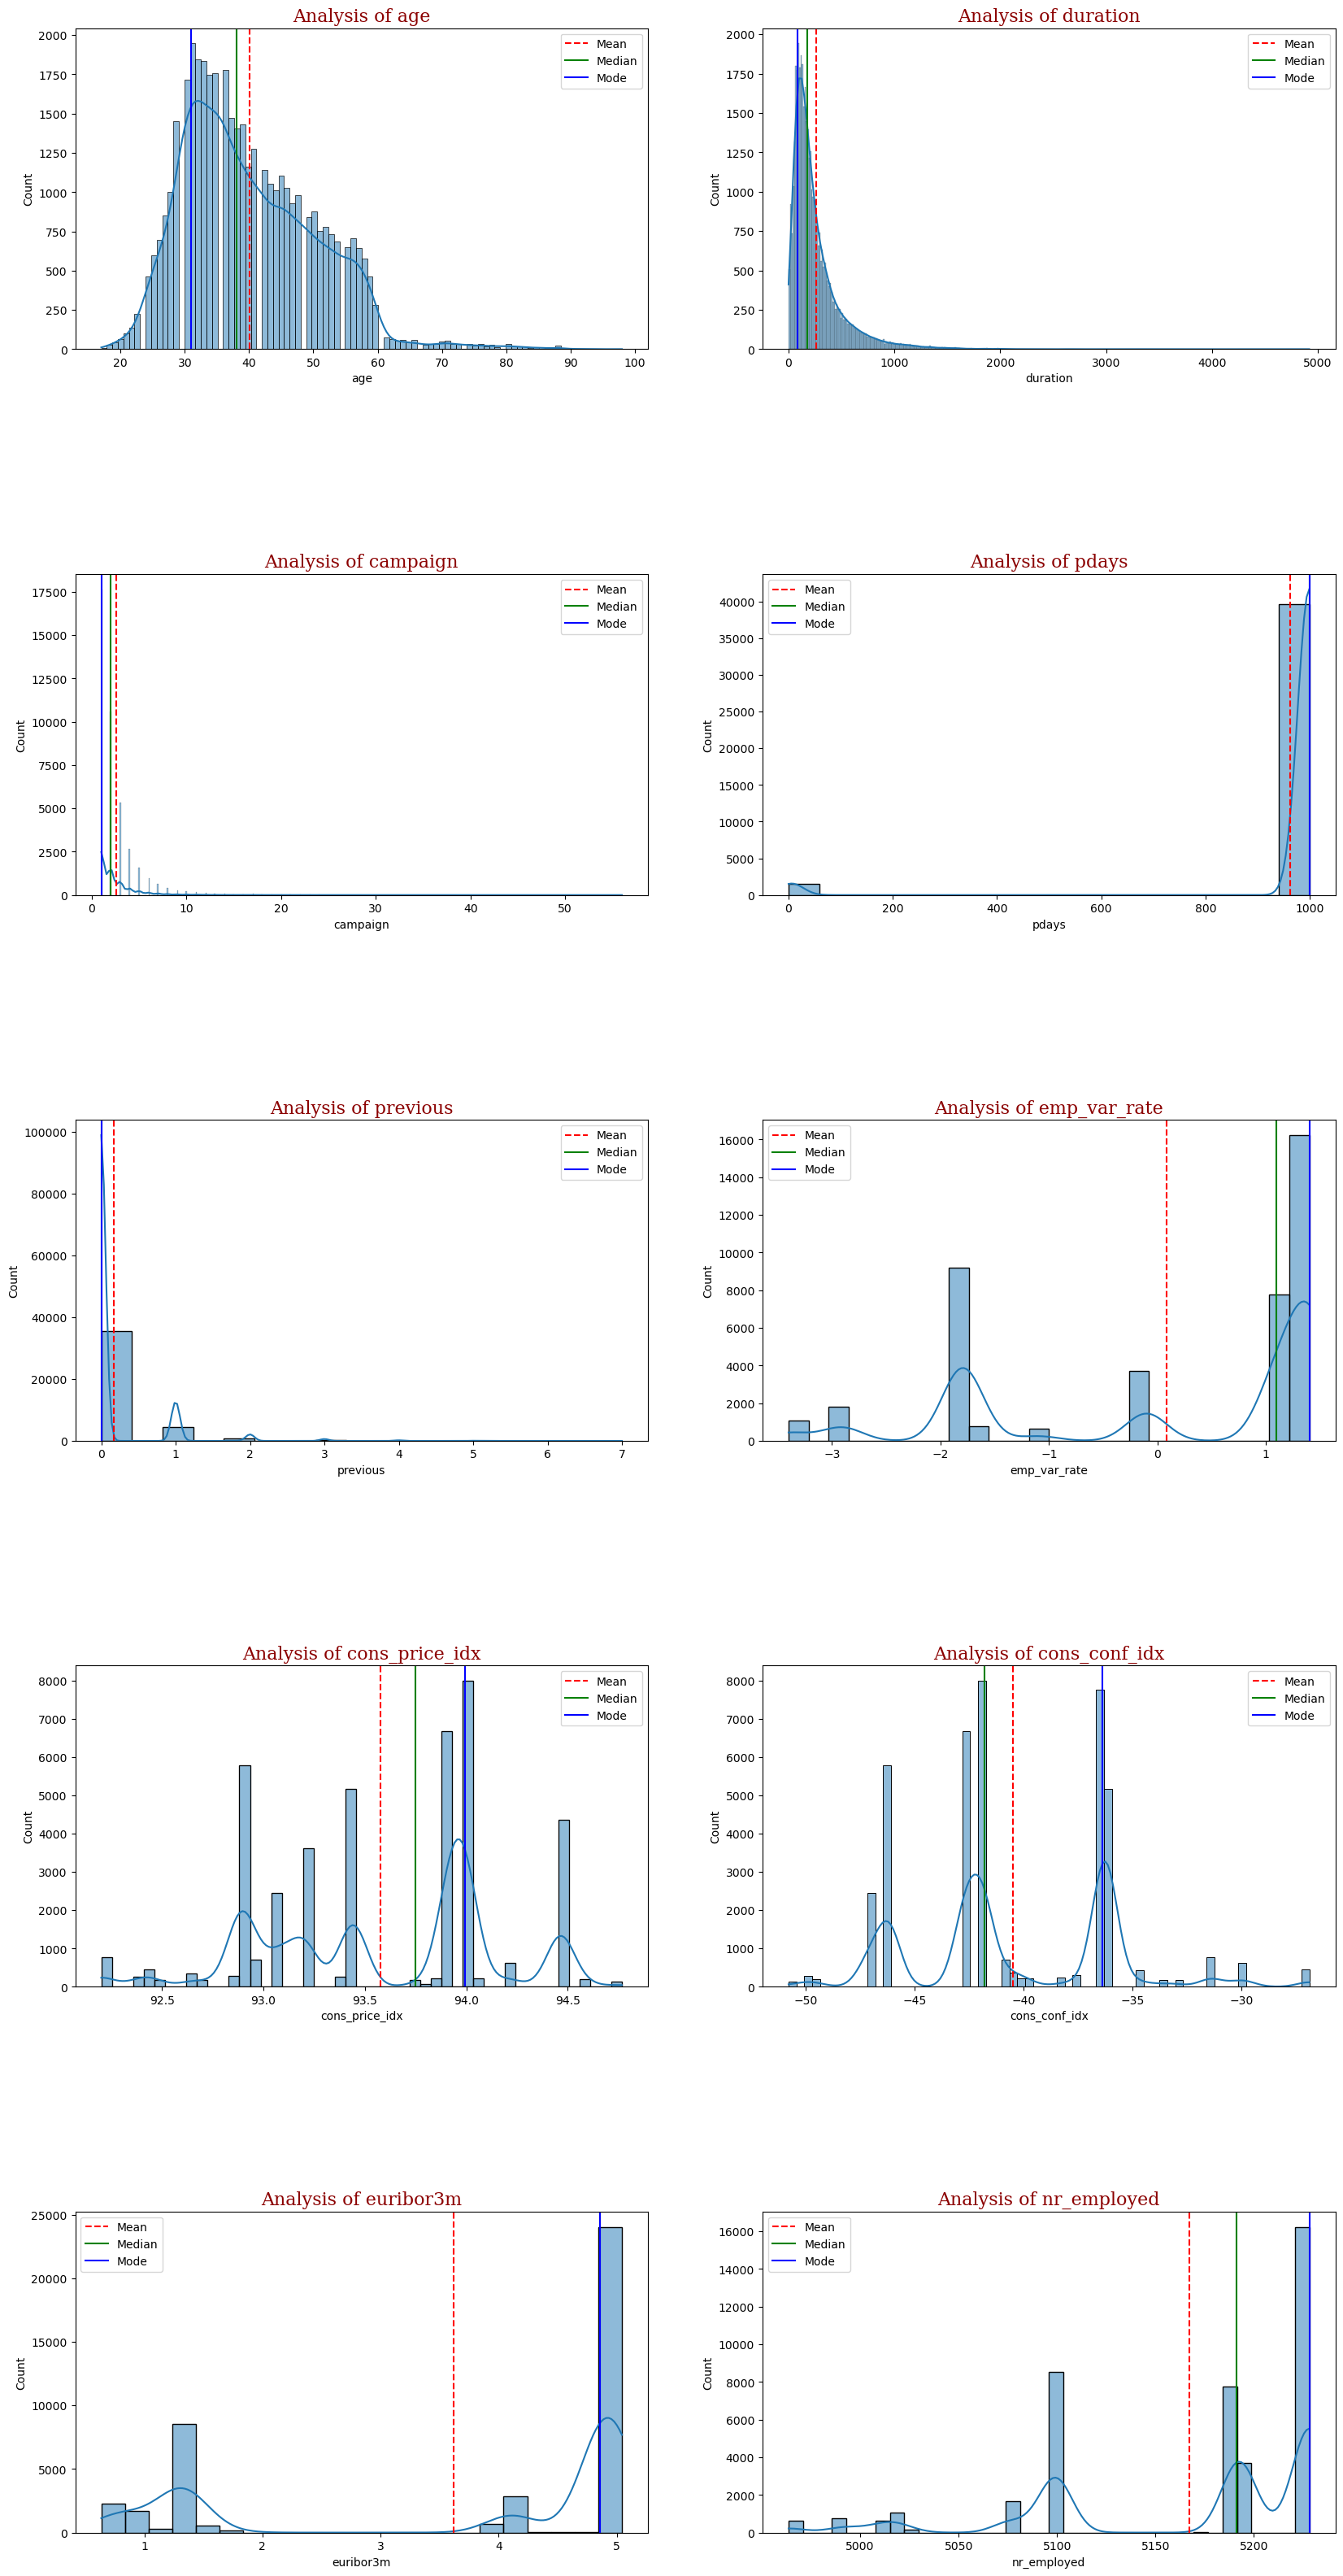

In [57]:
continuous_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

generate_distribution_plot(bank, continuous_features)

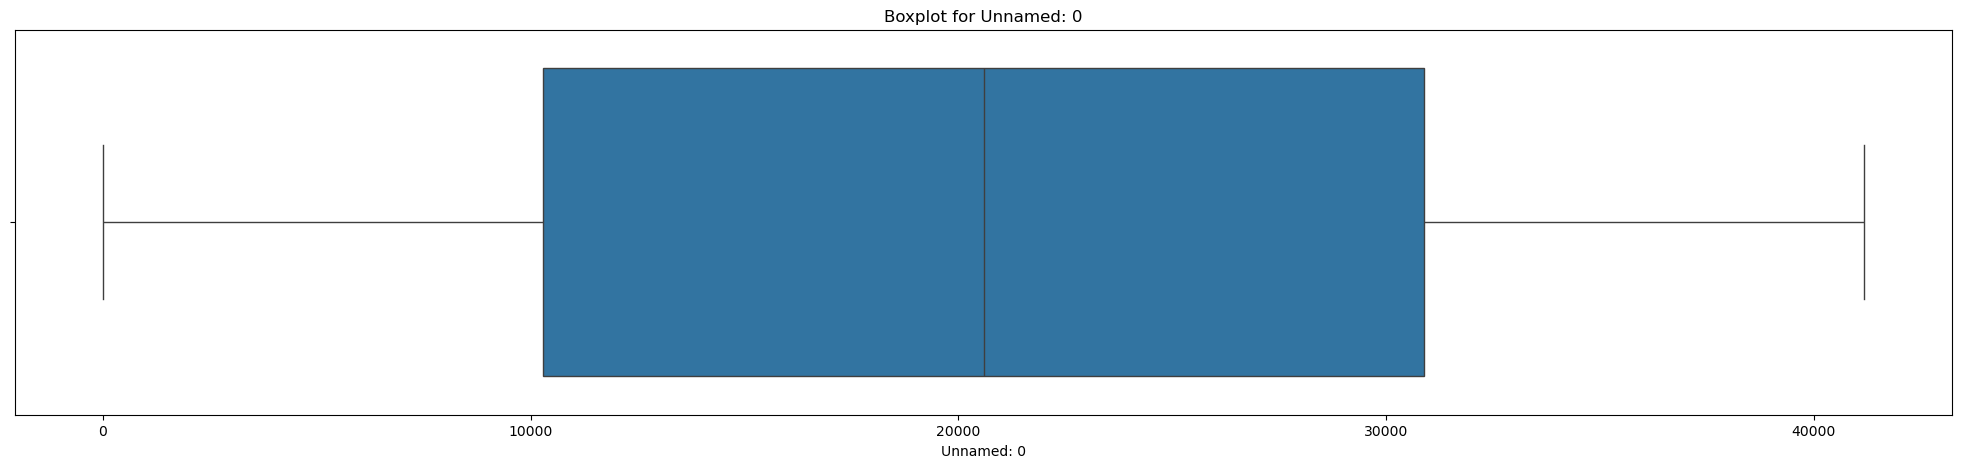

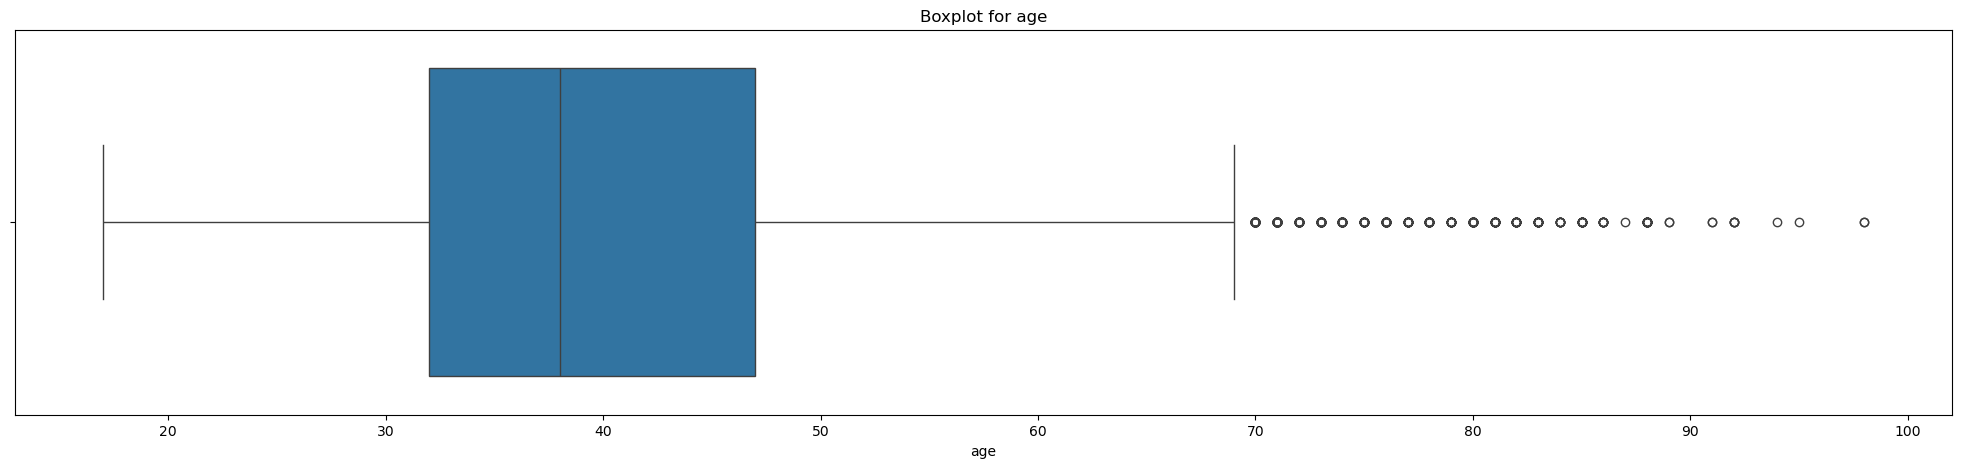

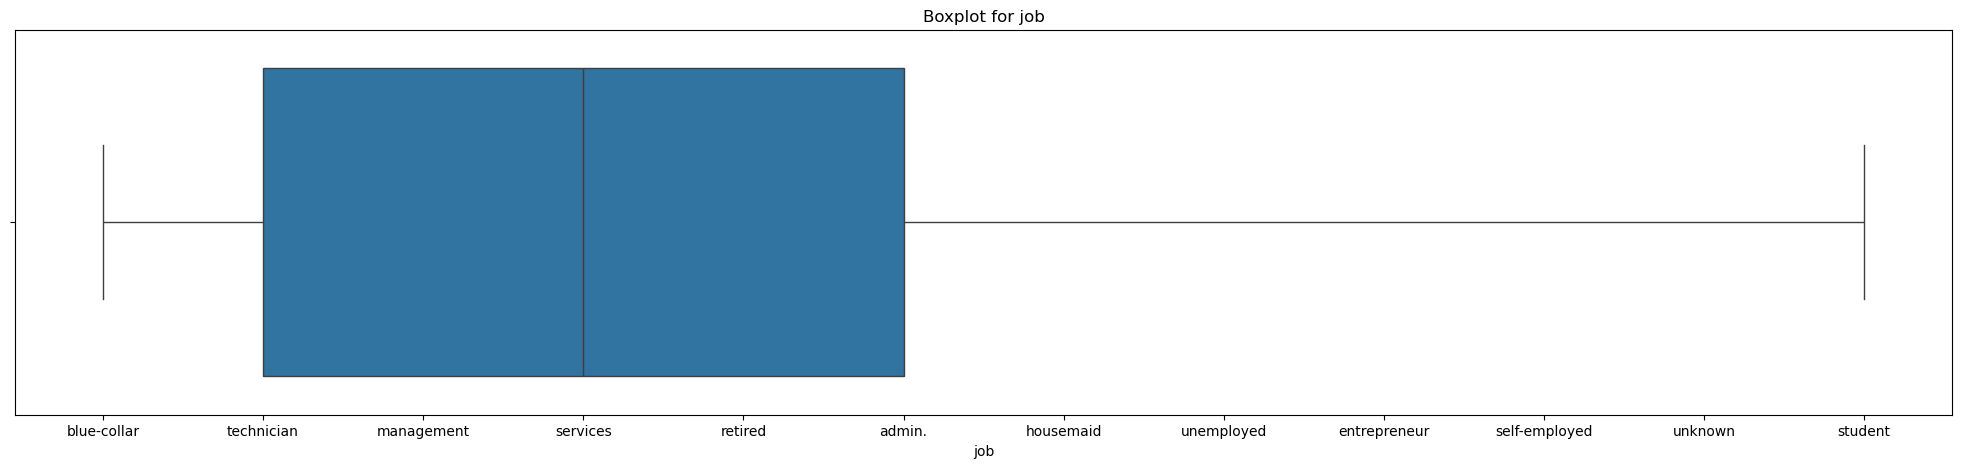

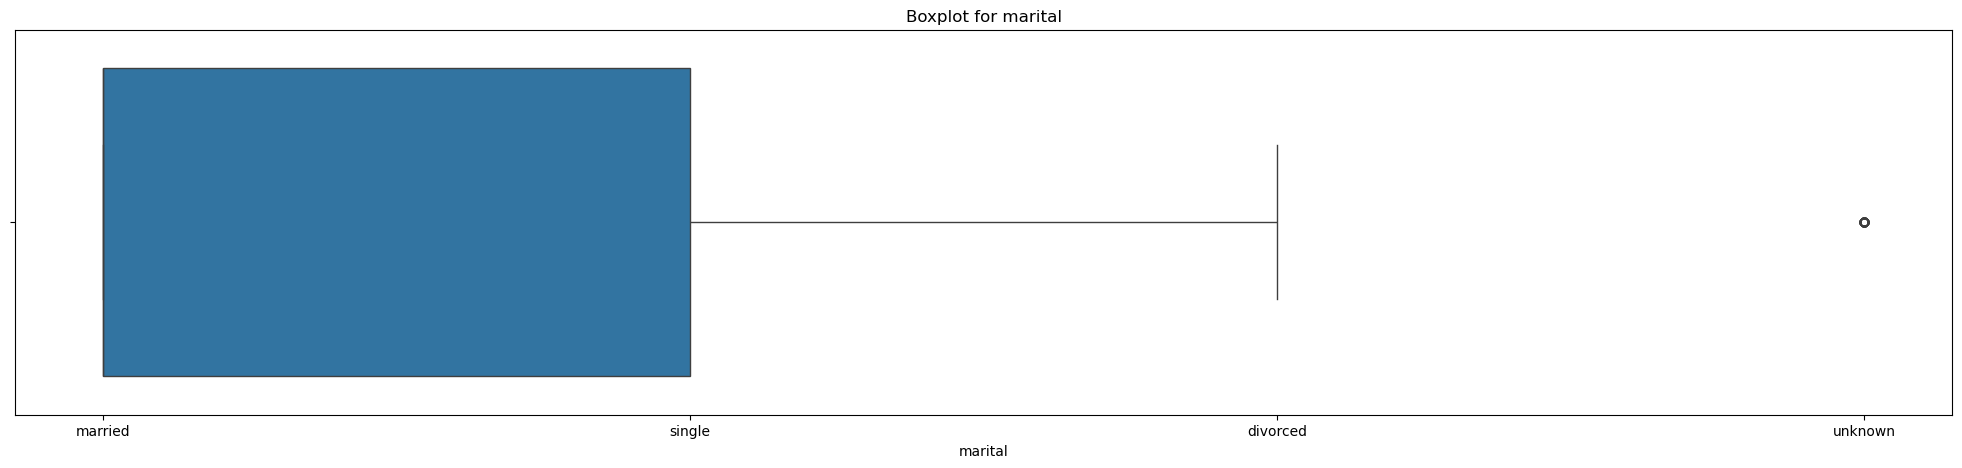

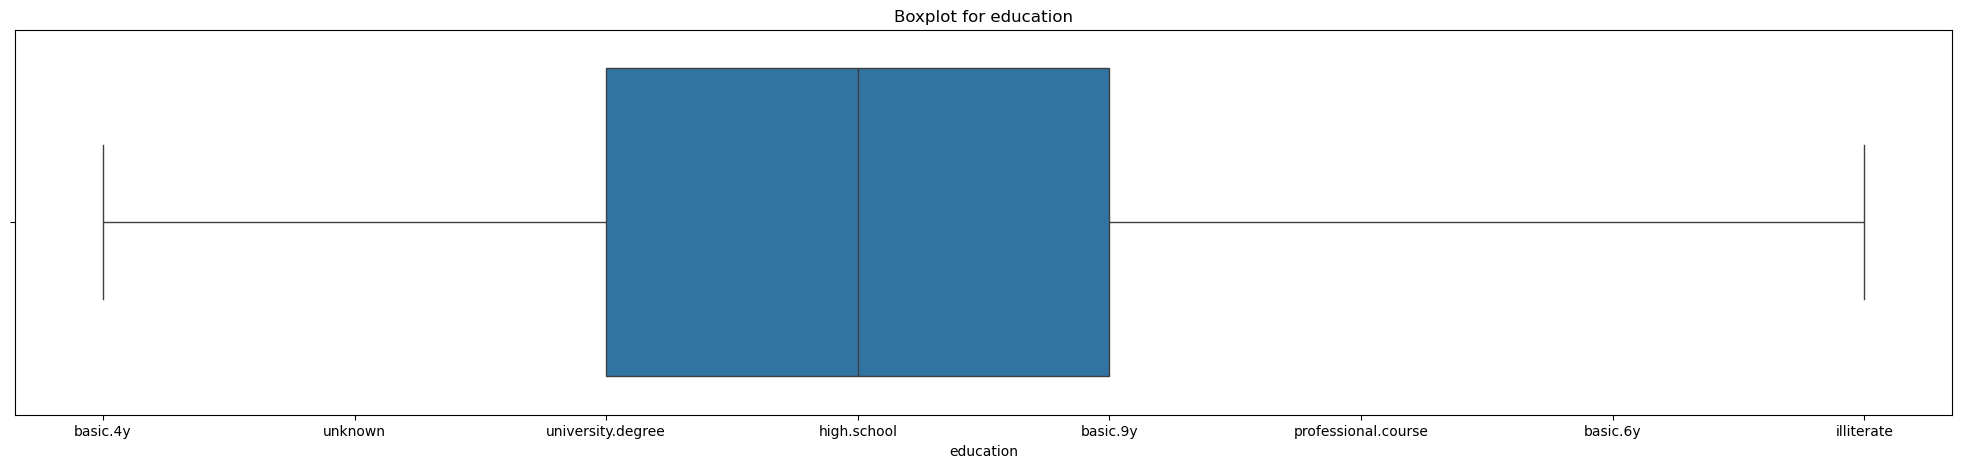

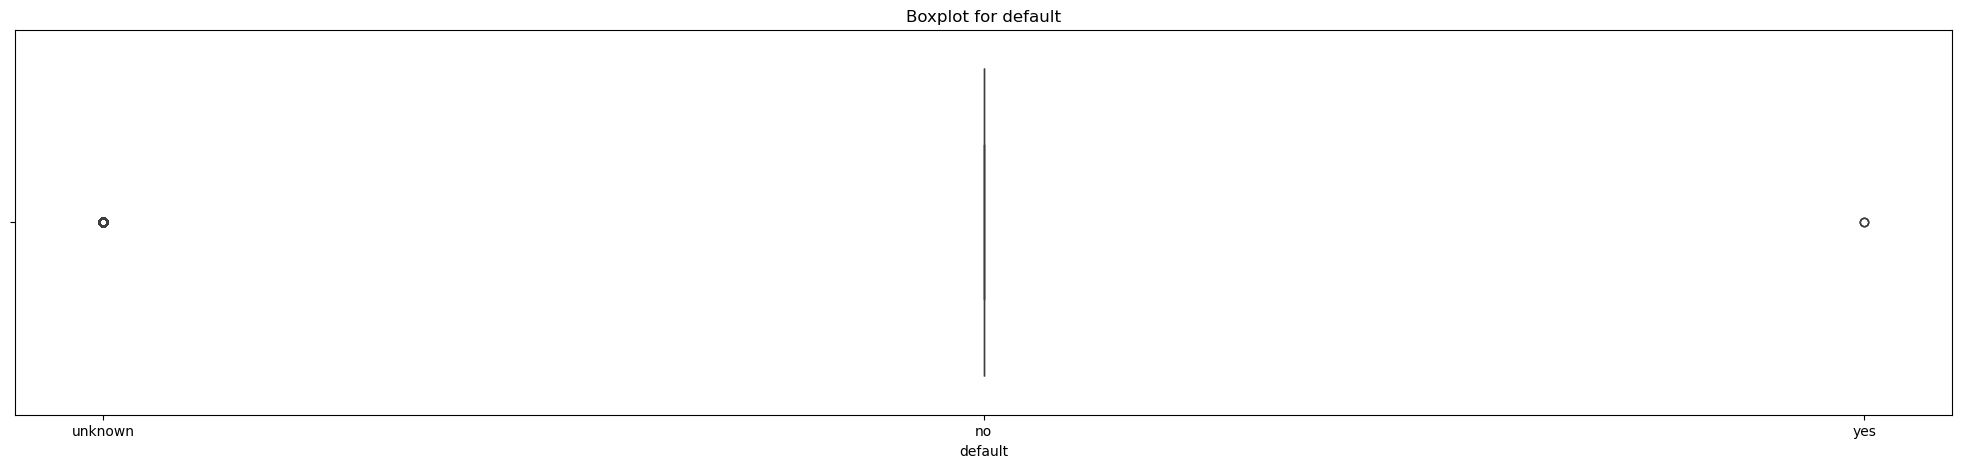

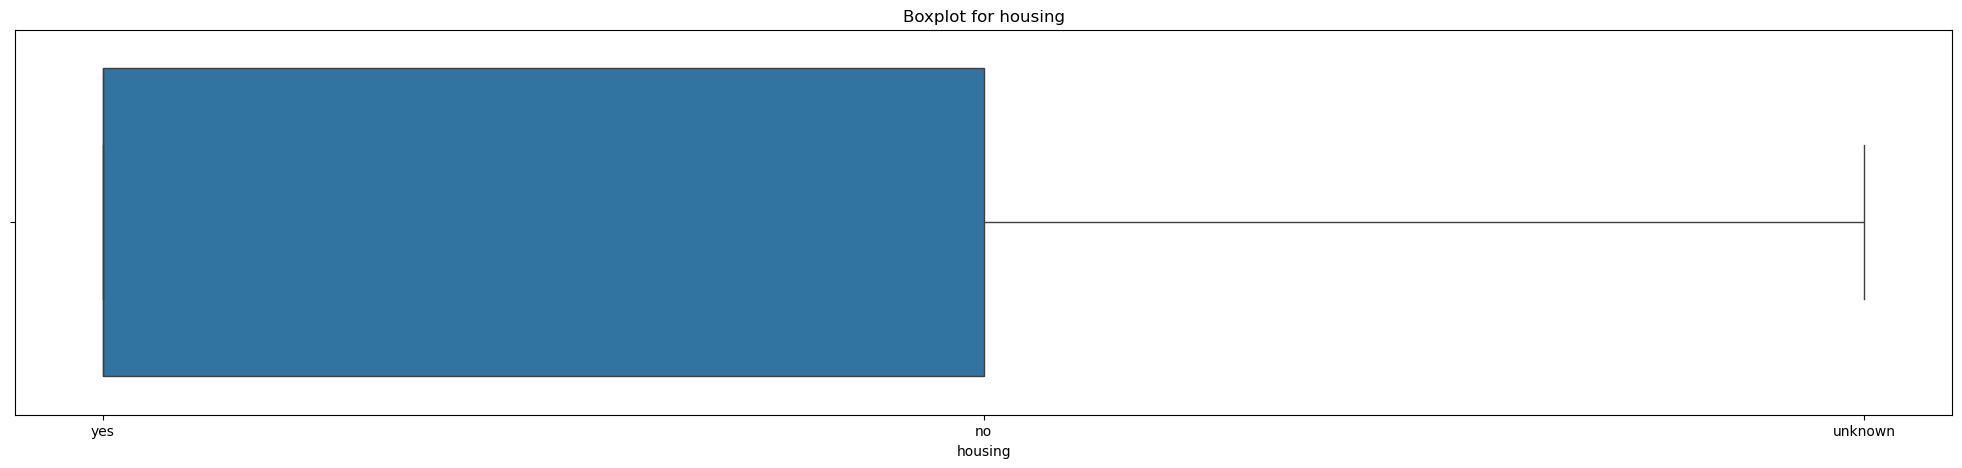

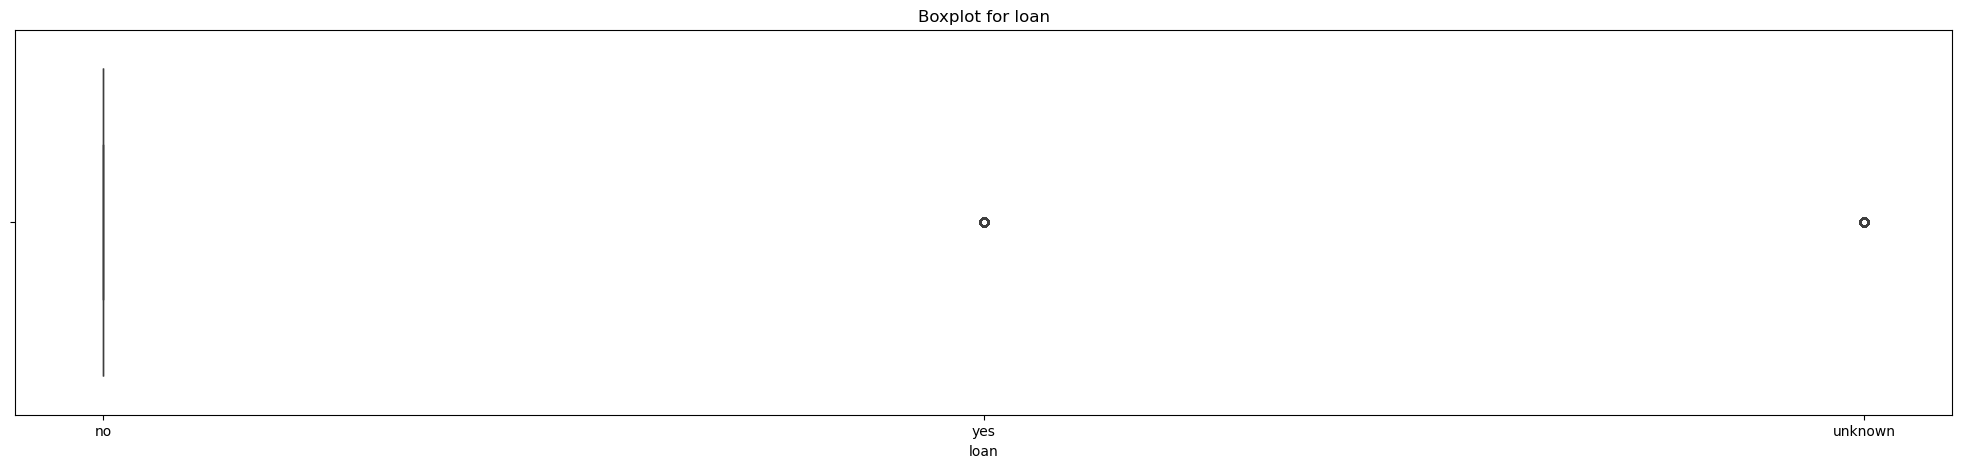

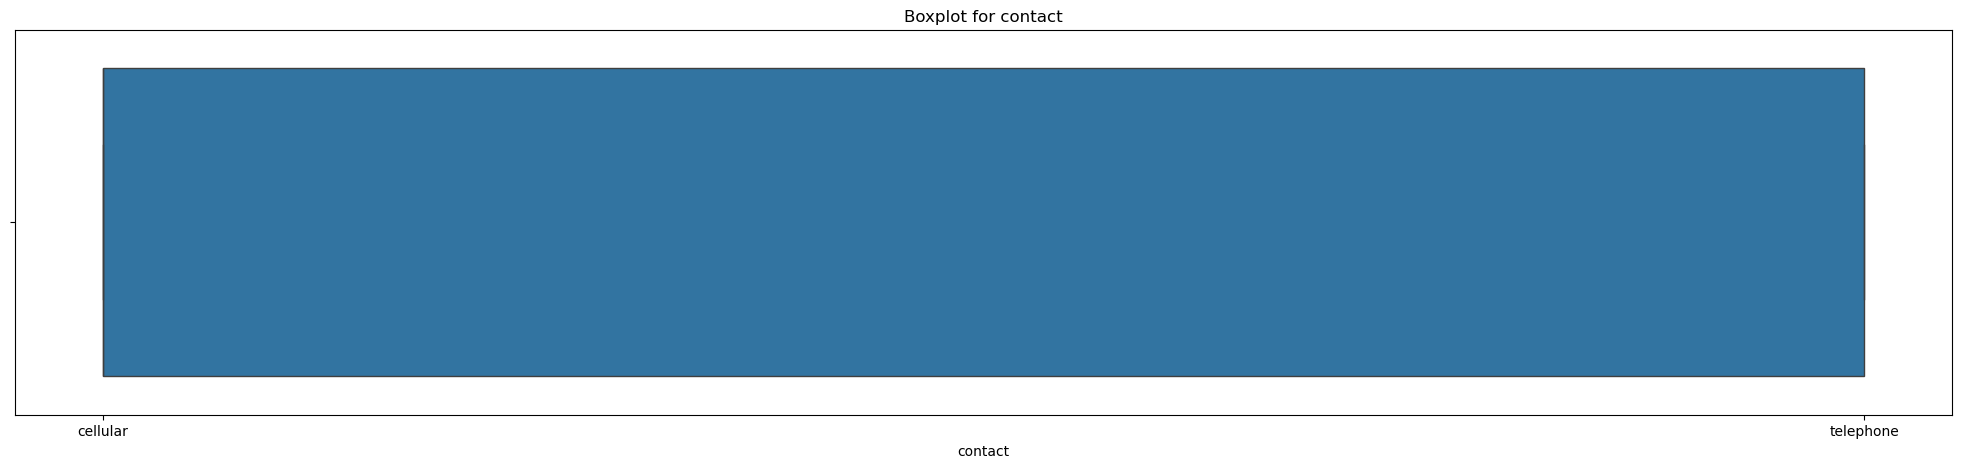

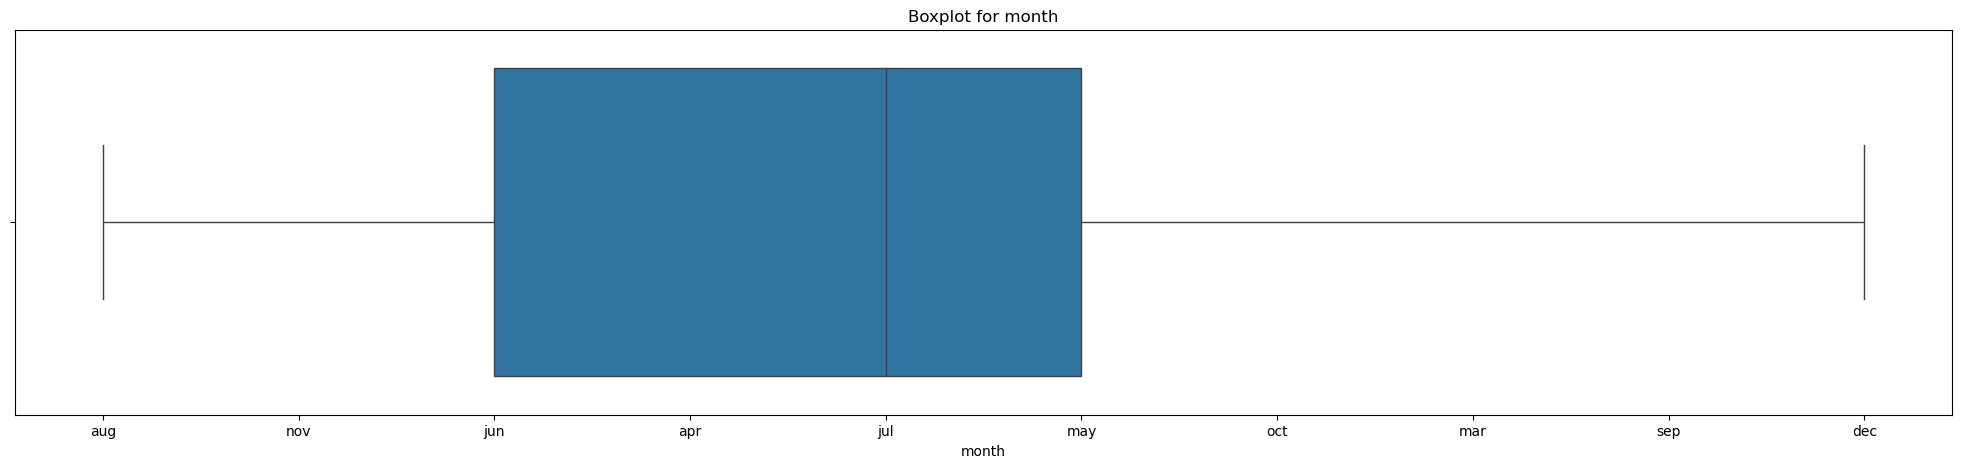

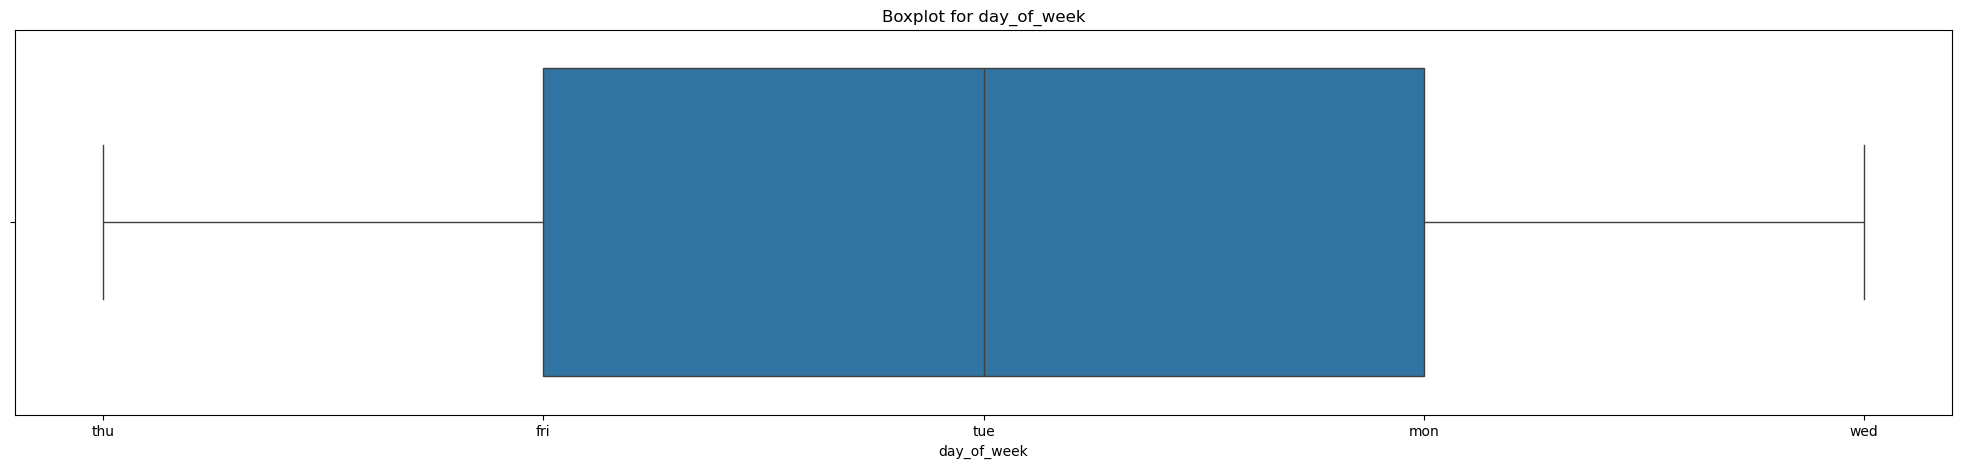

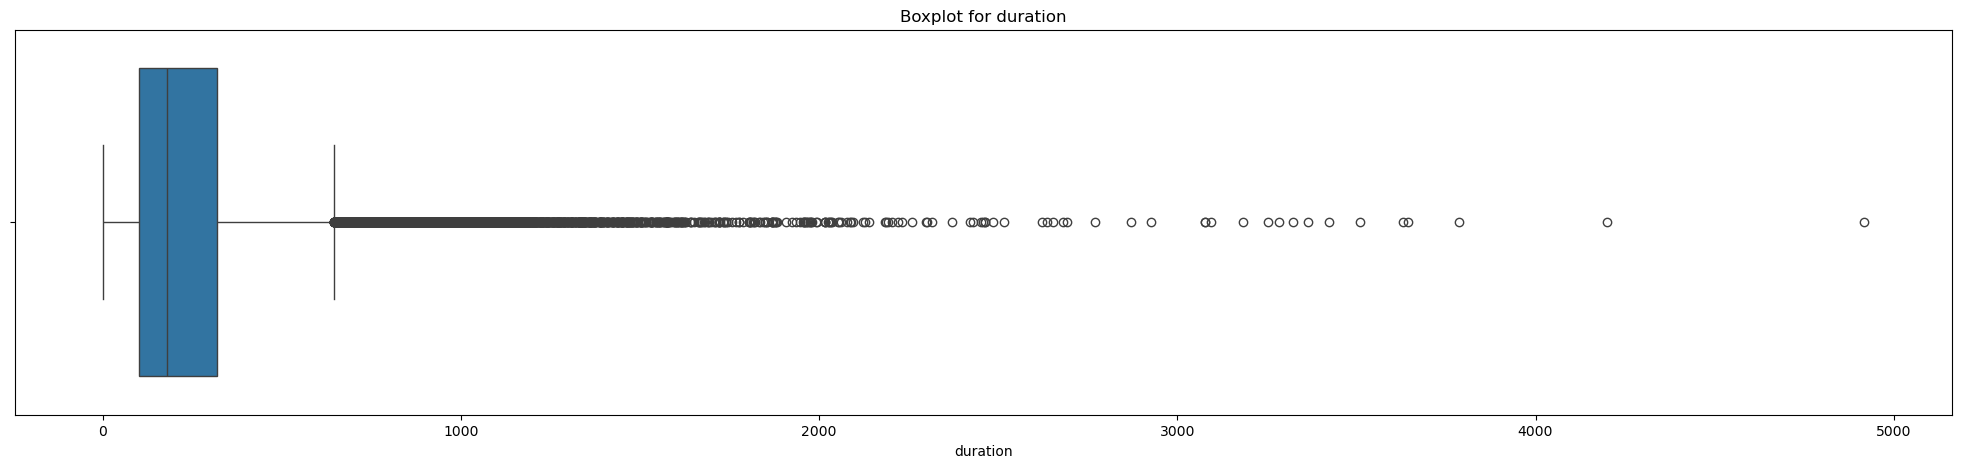

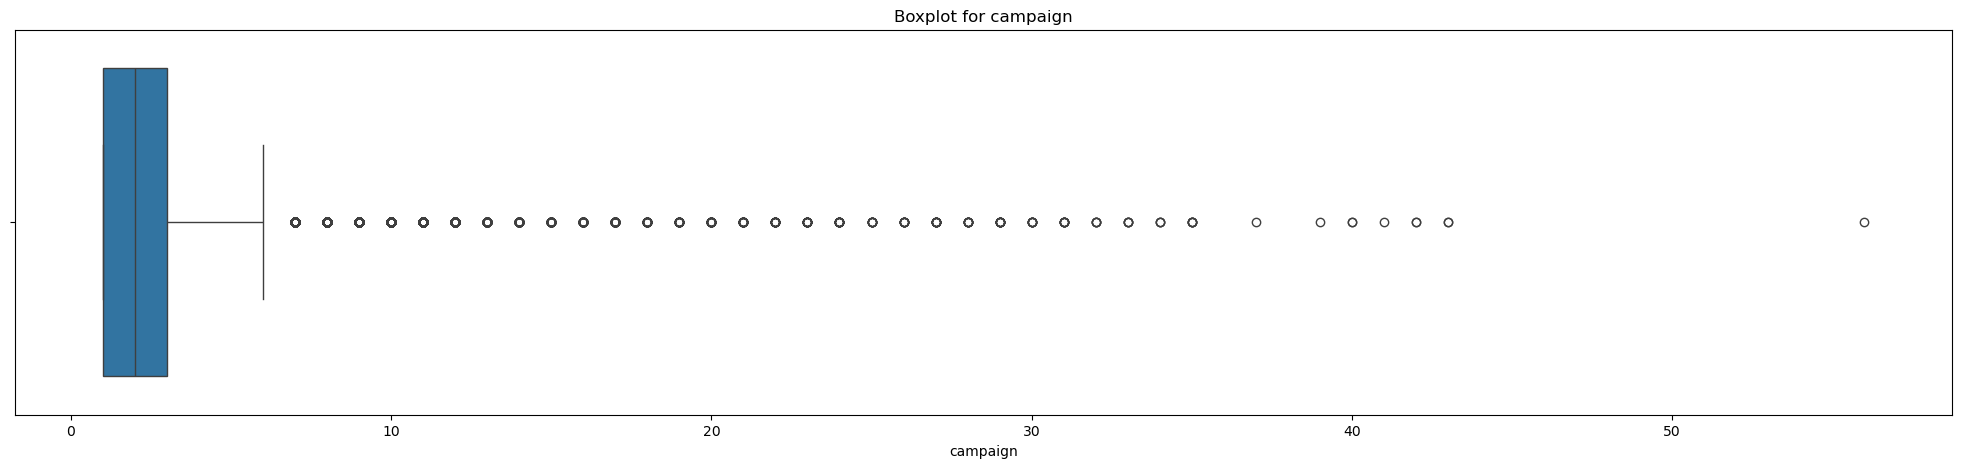

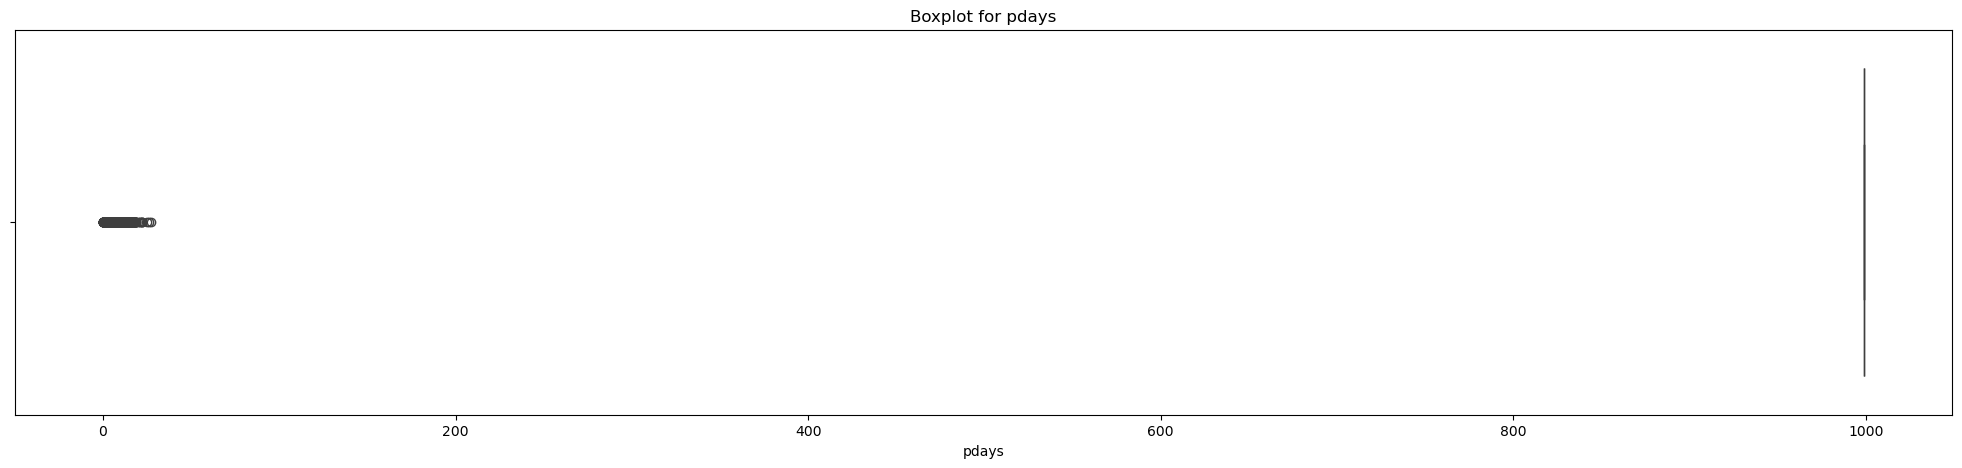

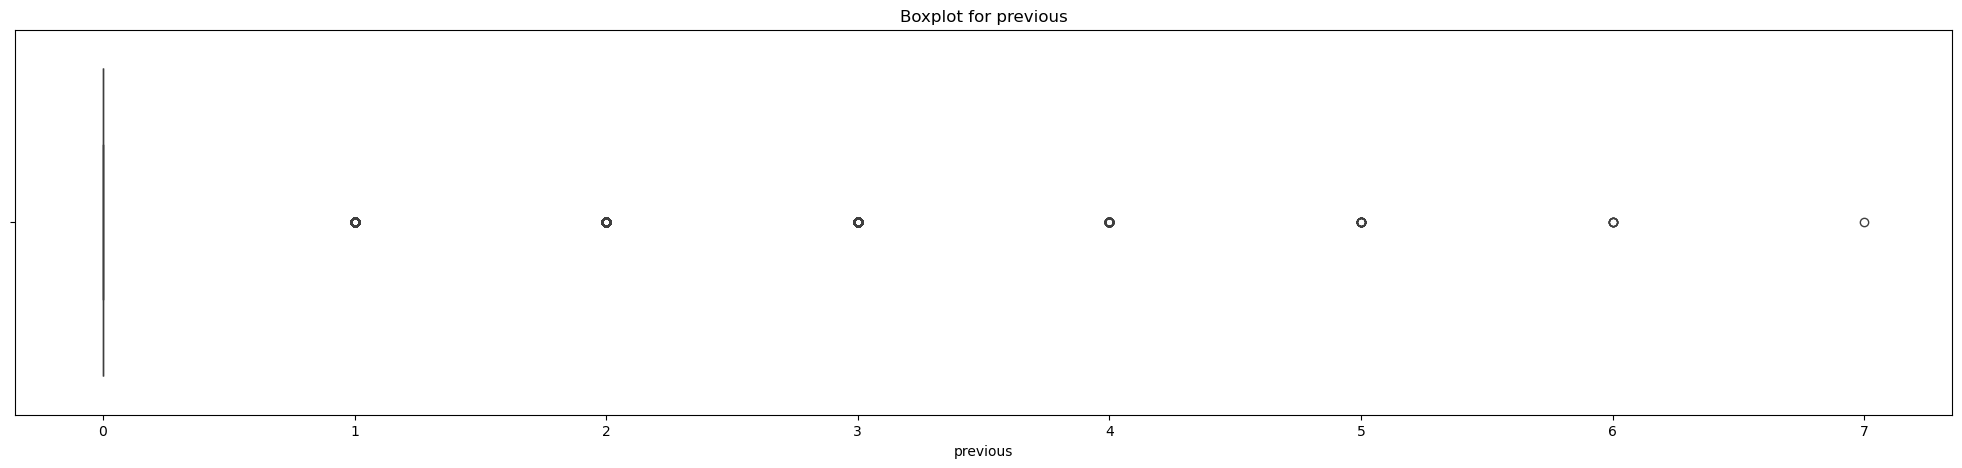

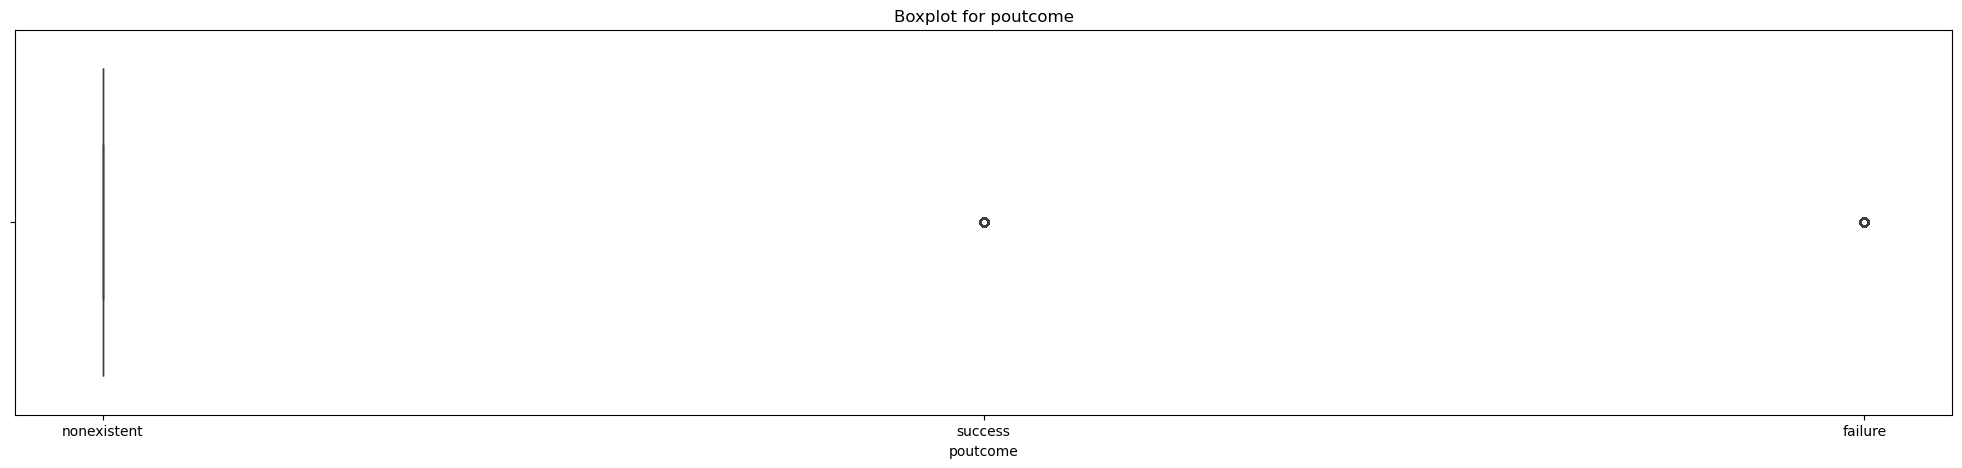

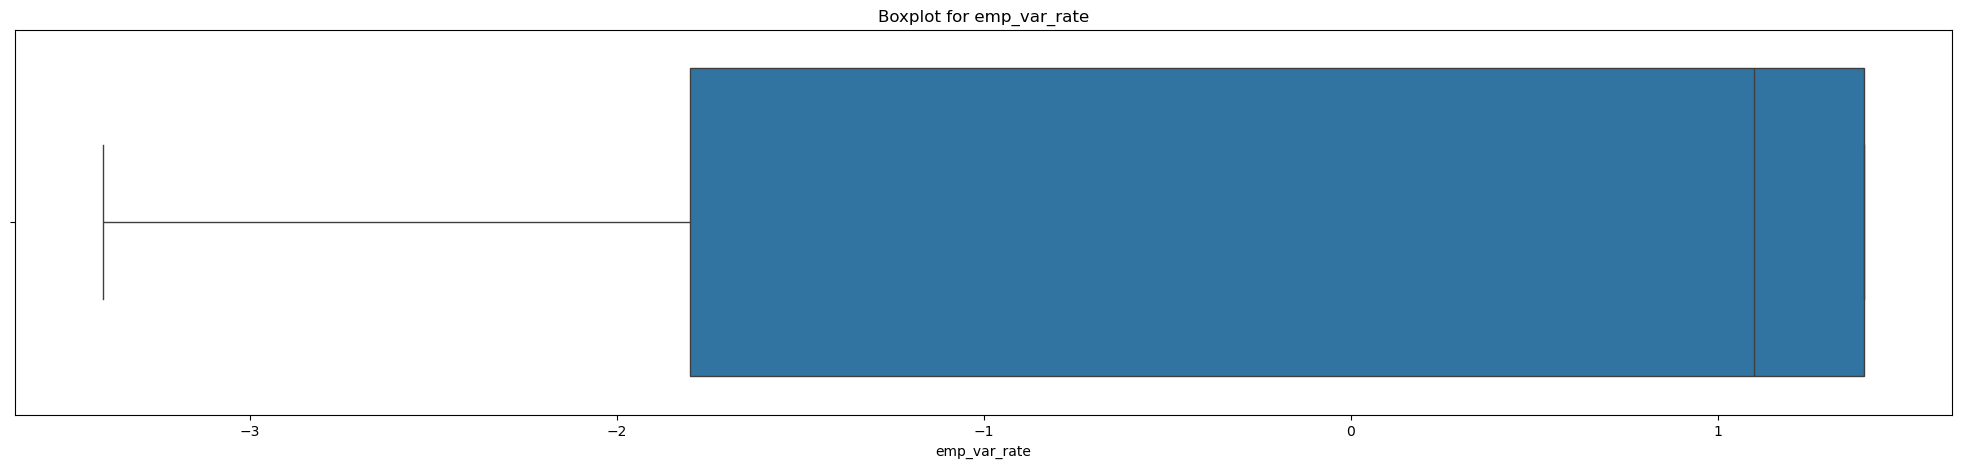

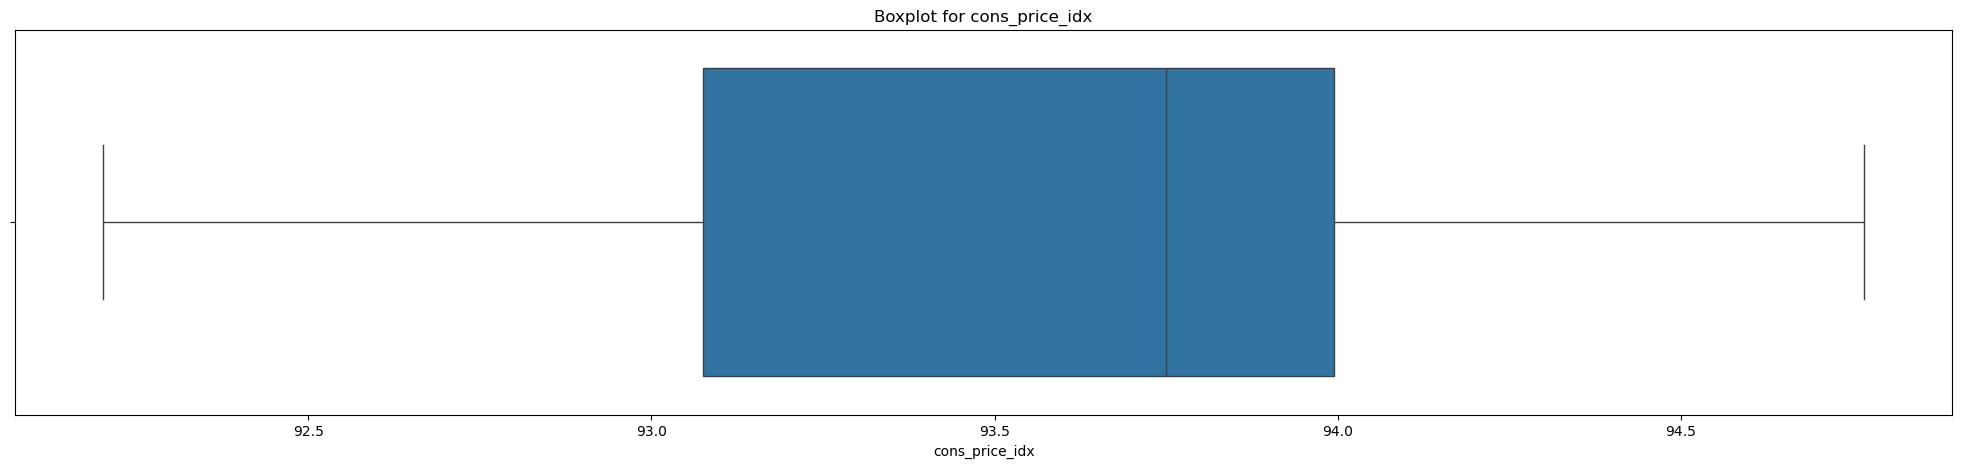

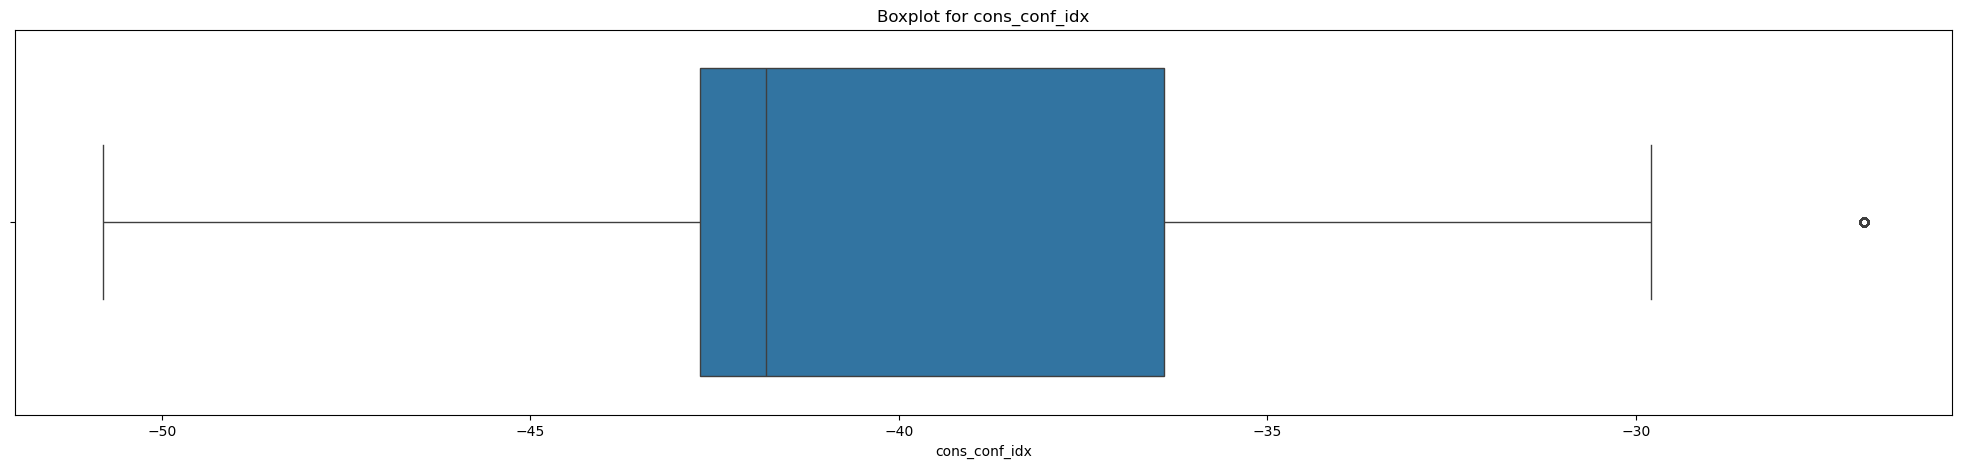

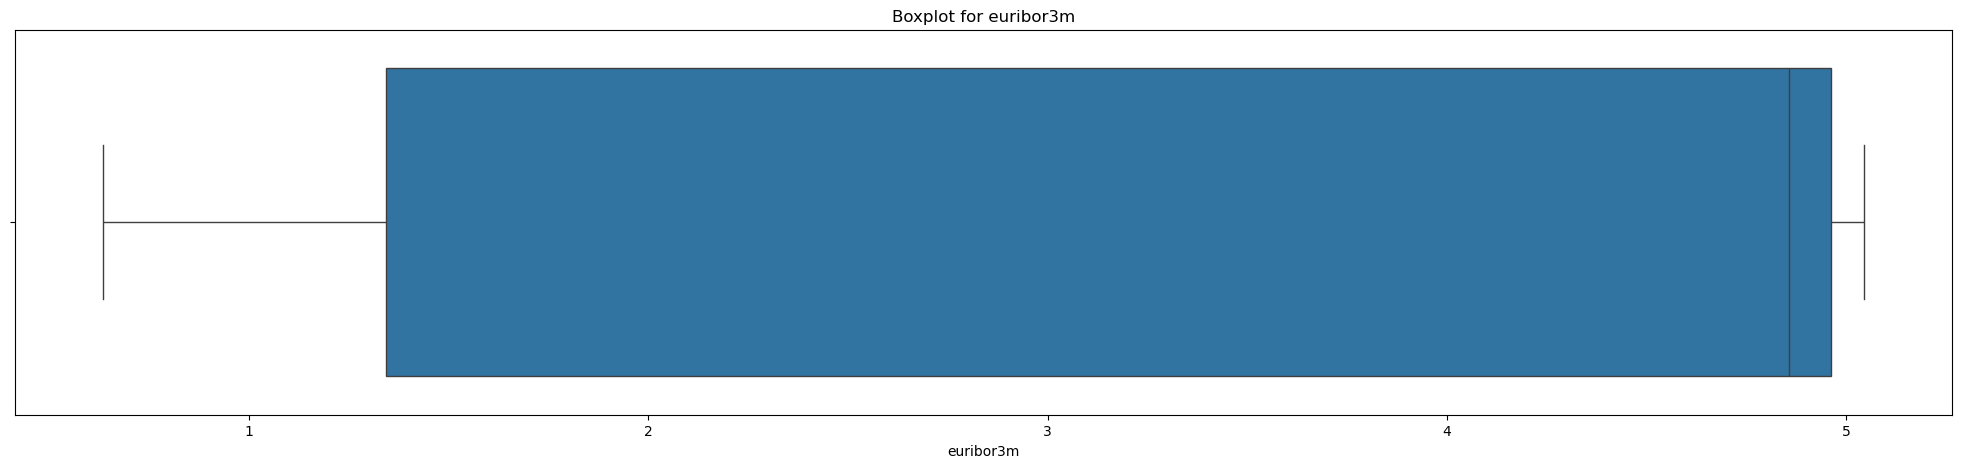

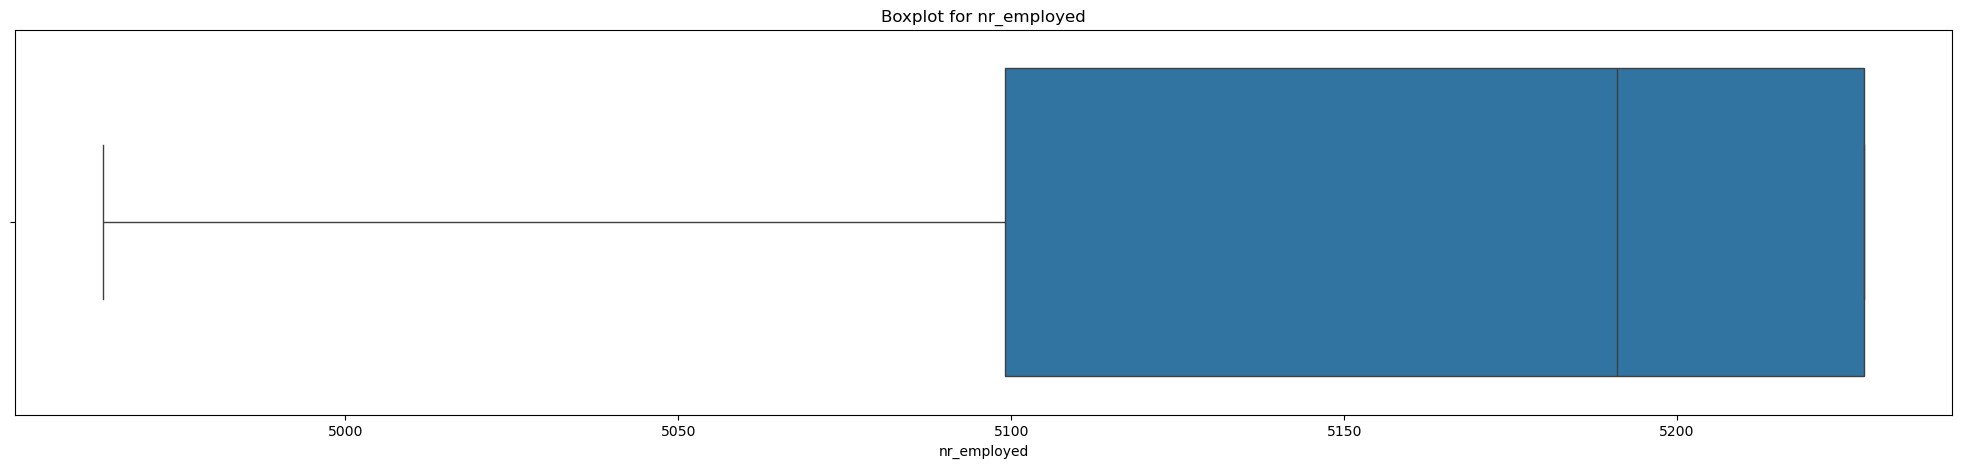

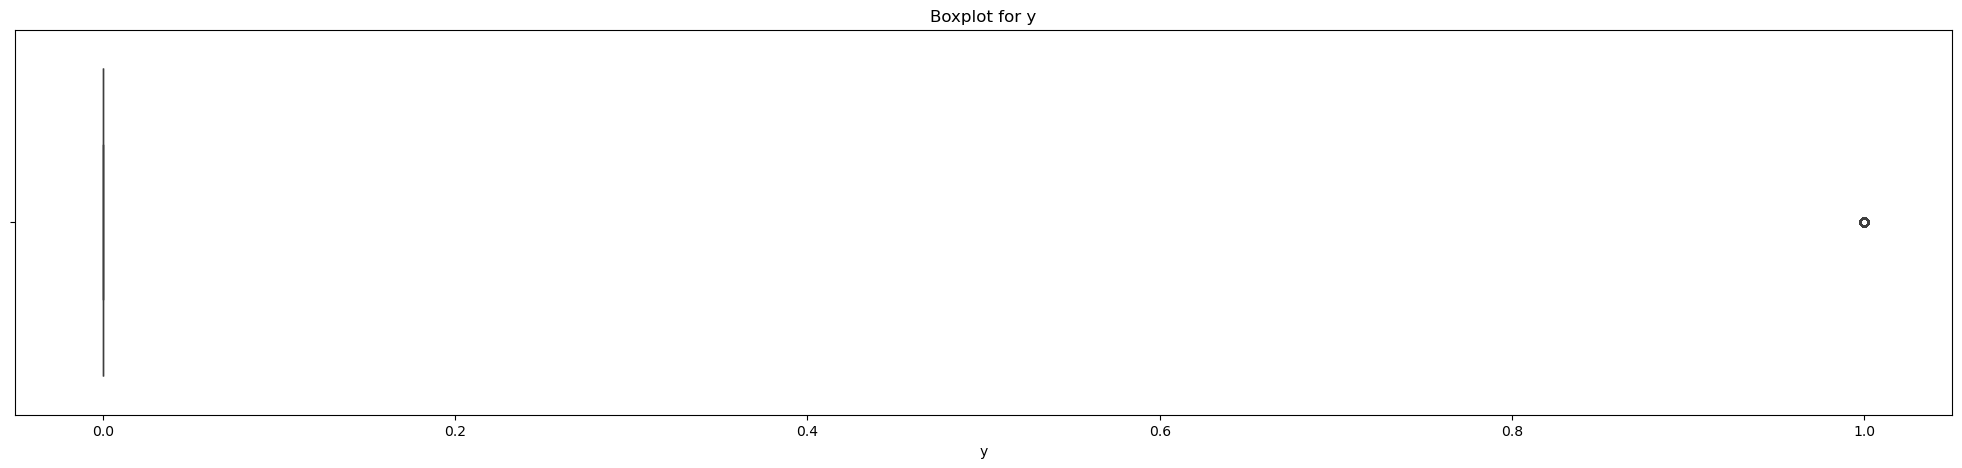

In [58]:
for i in bank.columns:
    plt.figure(figsize=(25, 5))  # Set the figure size
    sns.boxplot(x=bank[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

# Preprocessing 

In [59]:
bank.drop(columns='Unnamed: 0',inplace=True)

In [60]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [61]:
bank[bank.duplicated()].shape

(12, 21)

In [62]:
bank.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [63]:
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    bank[column].replace('unknown', bank[column].mode()[0], inplace=True)


C:\Users\Saeed\AppData\Local\Temp\ipykernel_14244\1364554761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank[column].replace('unknown', bank[column].mode()[0], inplace=True)


In [64]:
for column in bank.columns:
    print(f"Value counts for column '{column}':\n")
    print(bank[column].value_counts())
    print("\n" + "-"*40 + "\n")

Value counts for column 'age':

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
89       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

----------------------------------------

Value counts for column 'job':

job
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

----------------------------------------

Value counts for column 'marital':

marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64

----------------------------------------

Value counts for column 'education':

education
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate     

In [65]:
def cap_outliers_iqr(df, cols):
    df_capped = df.copy()
    
    for col in cols:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
        
        if pd.api.types.is_integer_dtype(df[col]):
            df_capped[col] = df_capped[col].astype(int)
    
    return df_capped[cols]  # Return only the capped columns

cols_to_cap = ['age', 'duration', 'campaign']  

bank[cols_to_cap] = cap_outliers_iqr(bank, cols_to_cap)


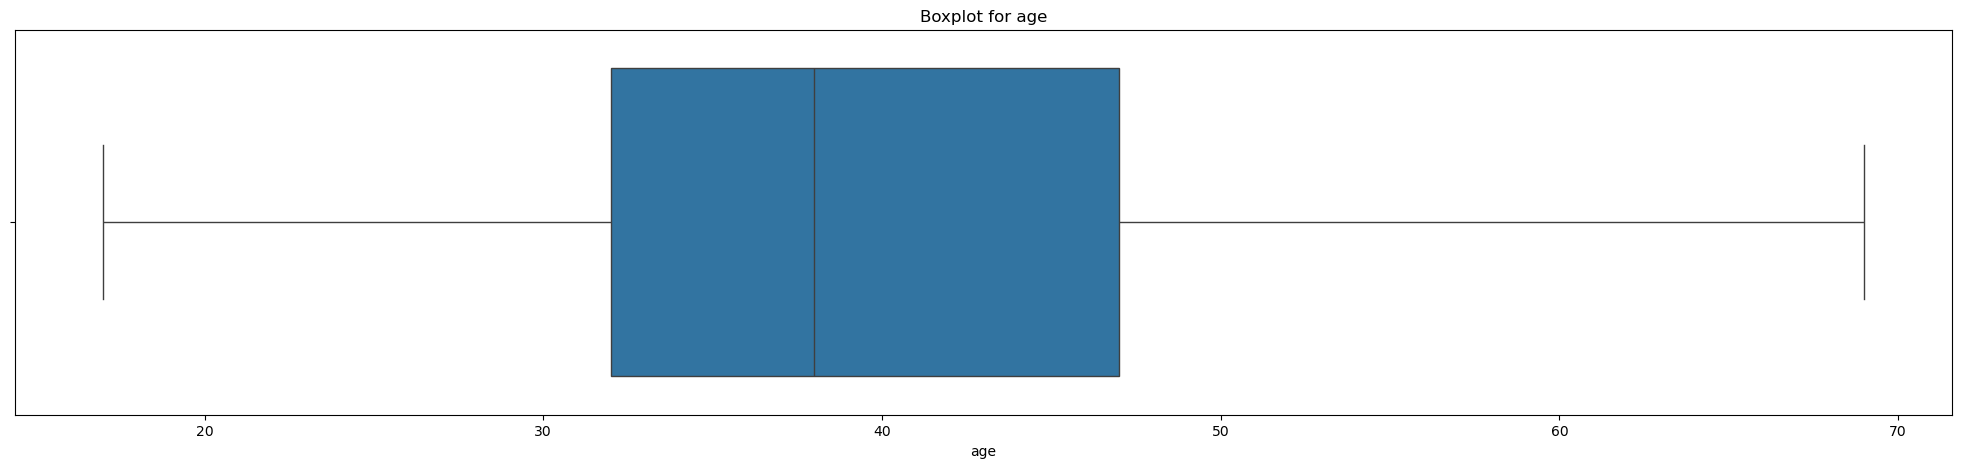

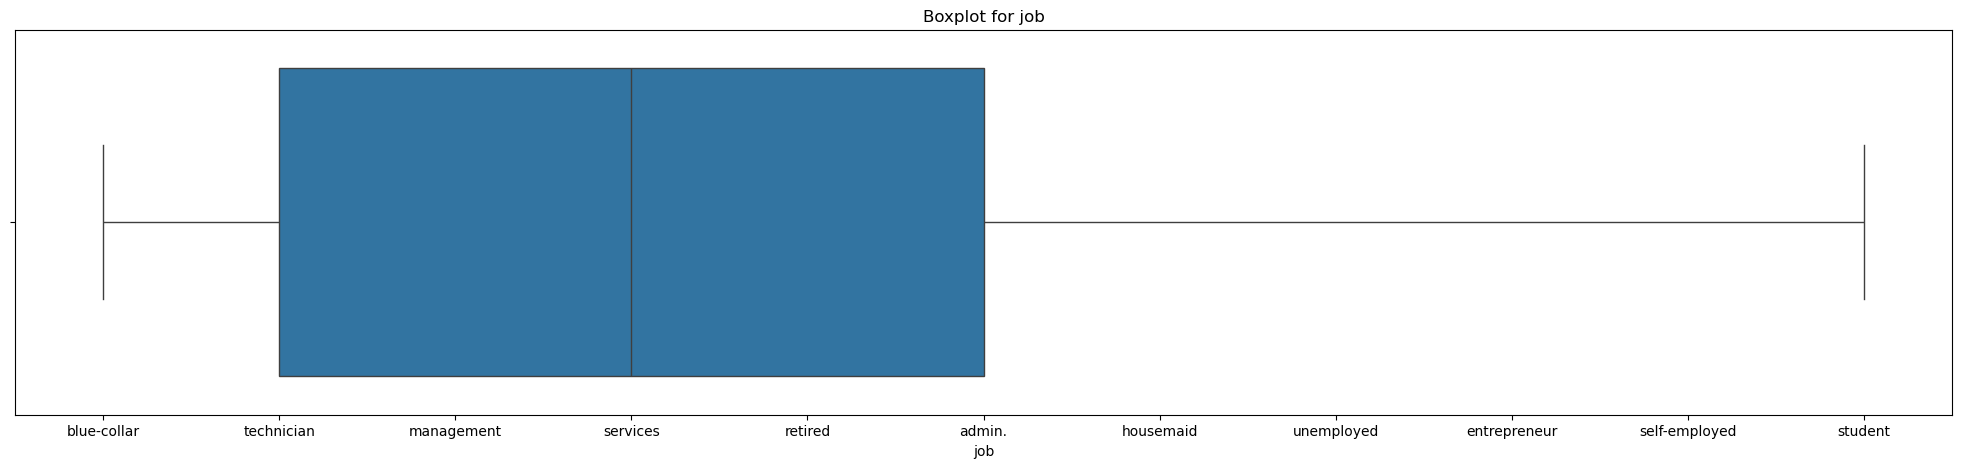

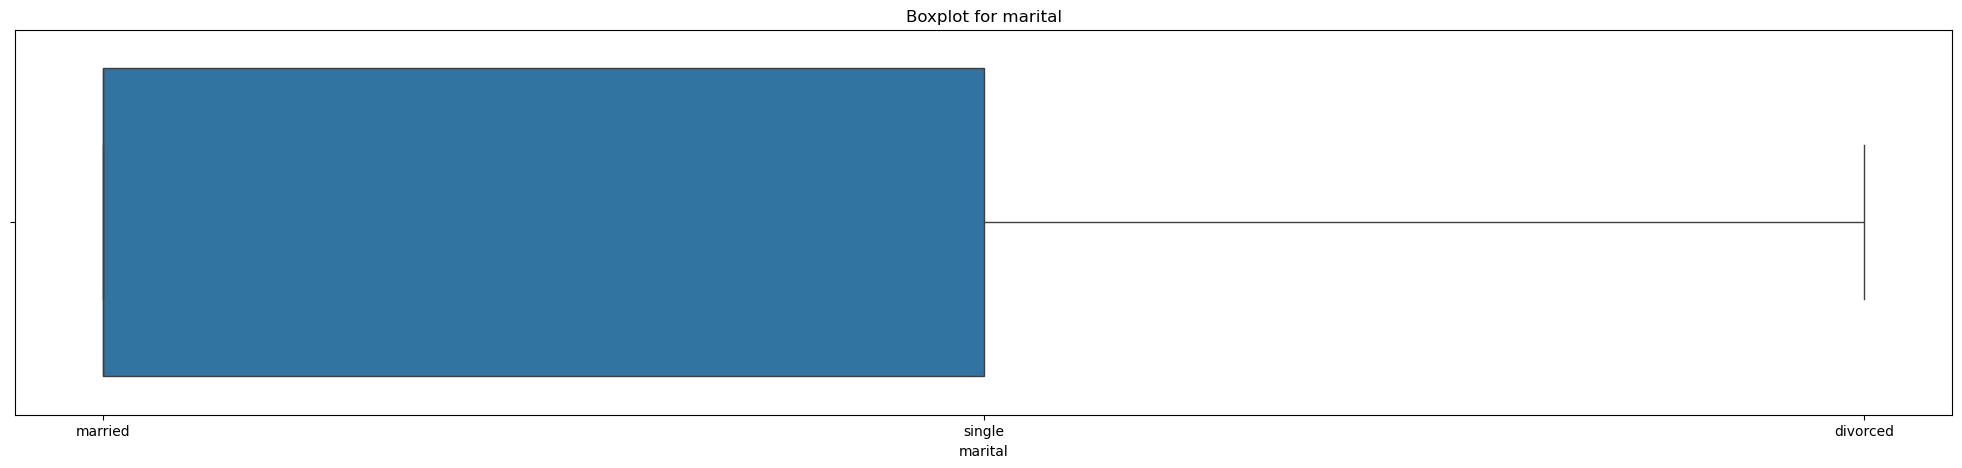

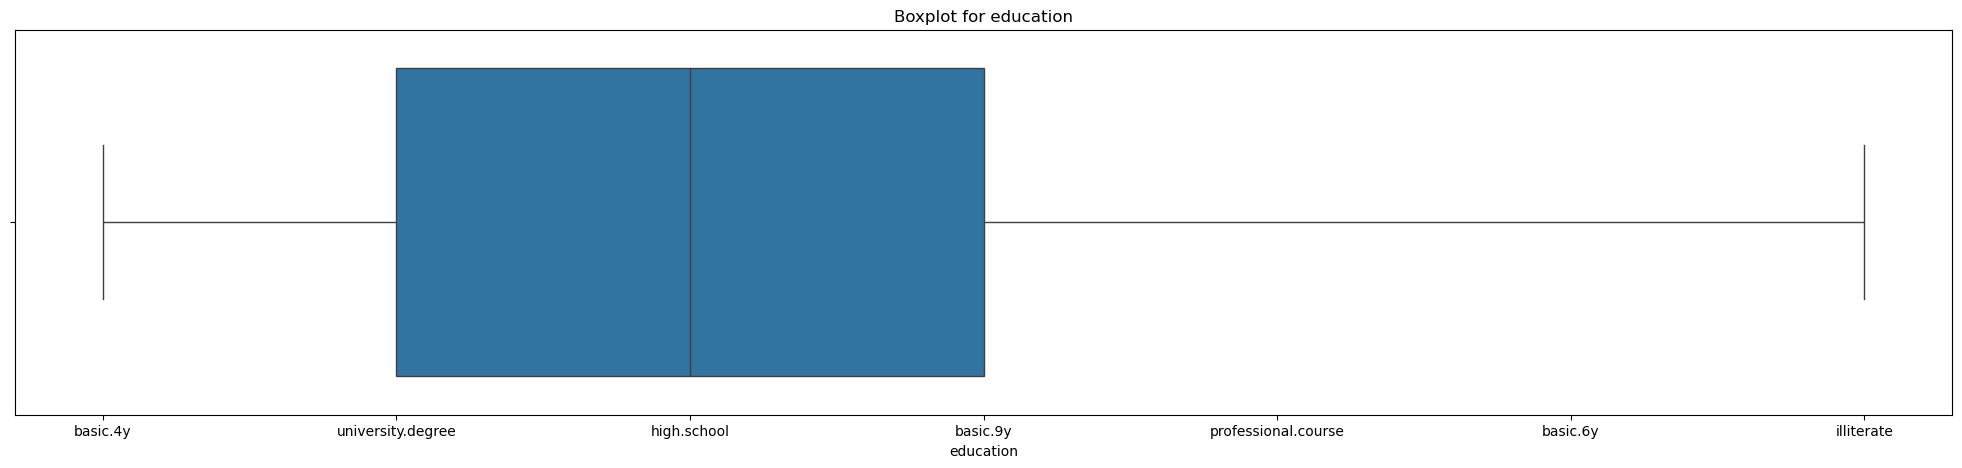

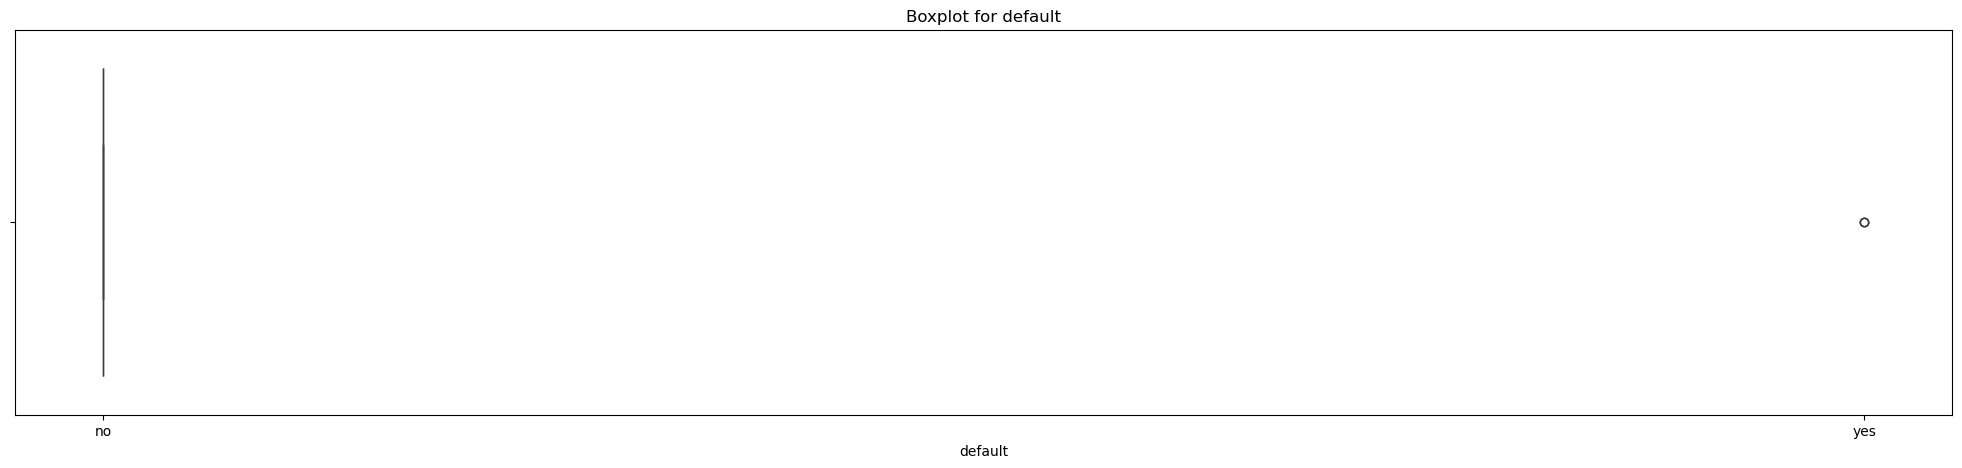

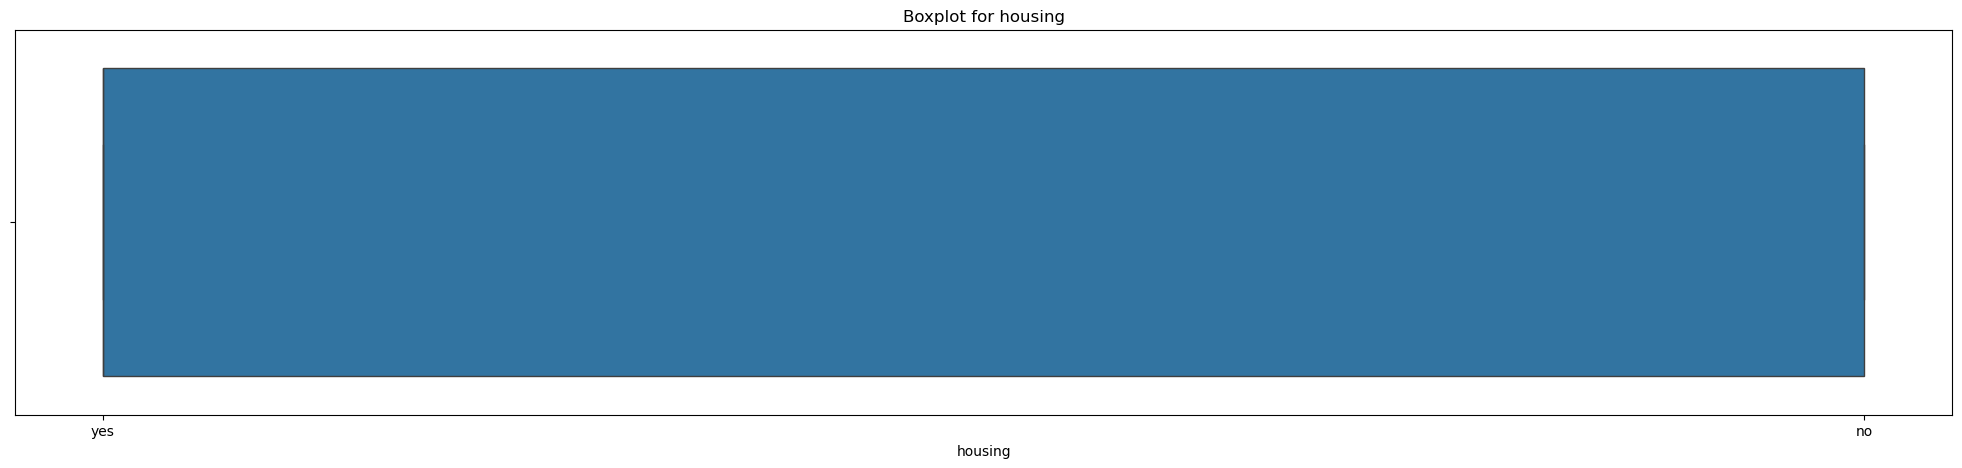

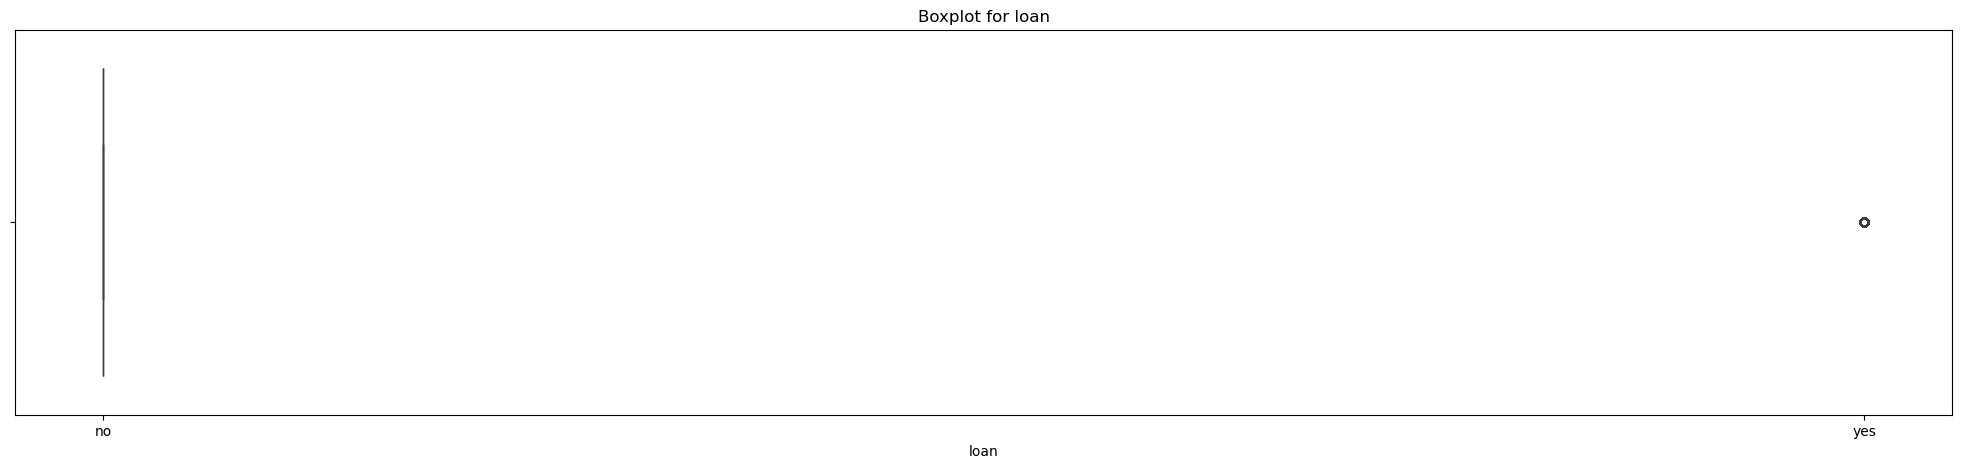

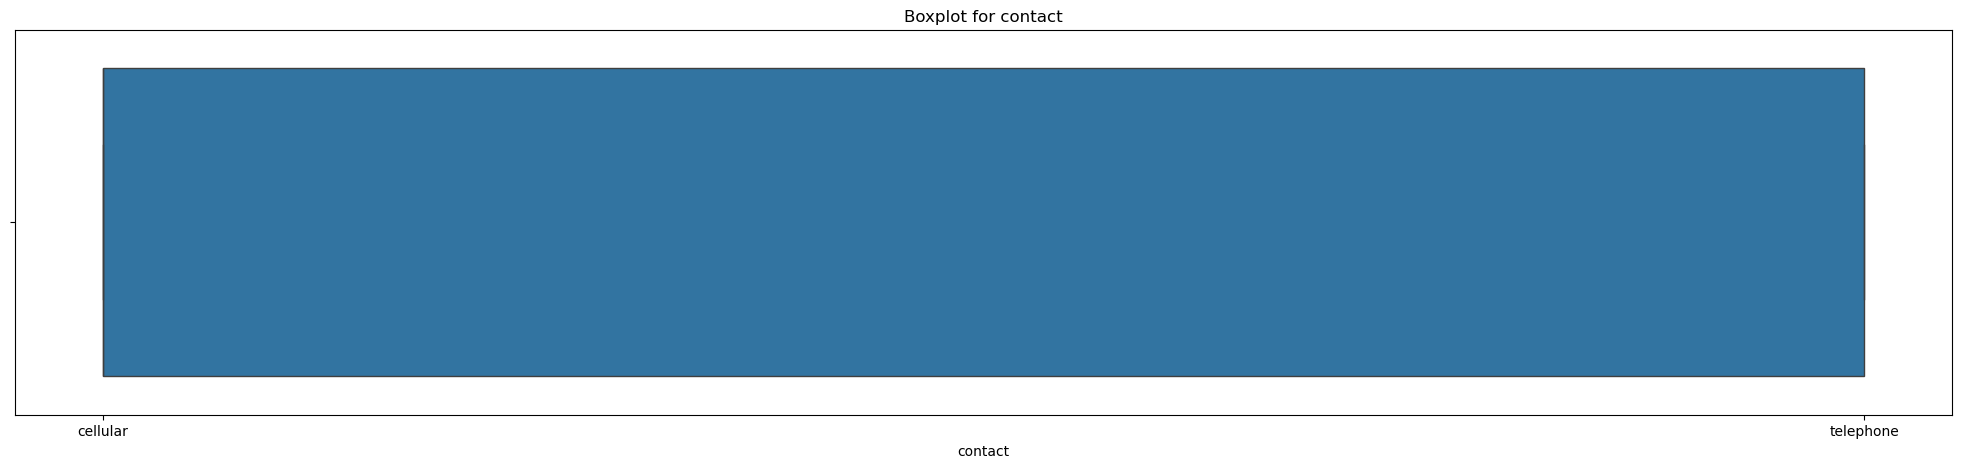

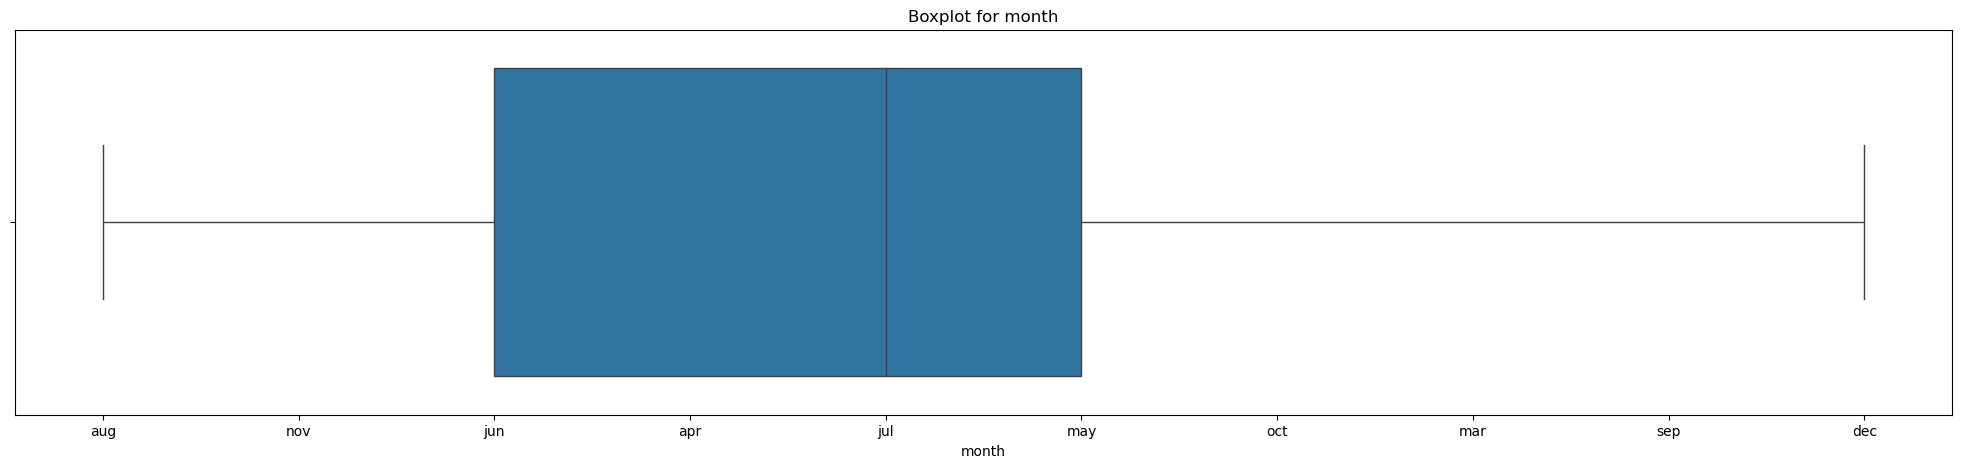

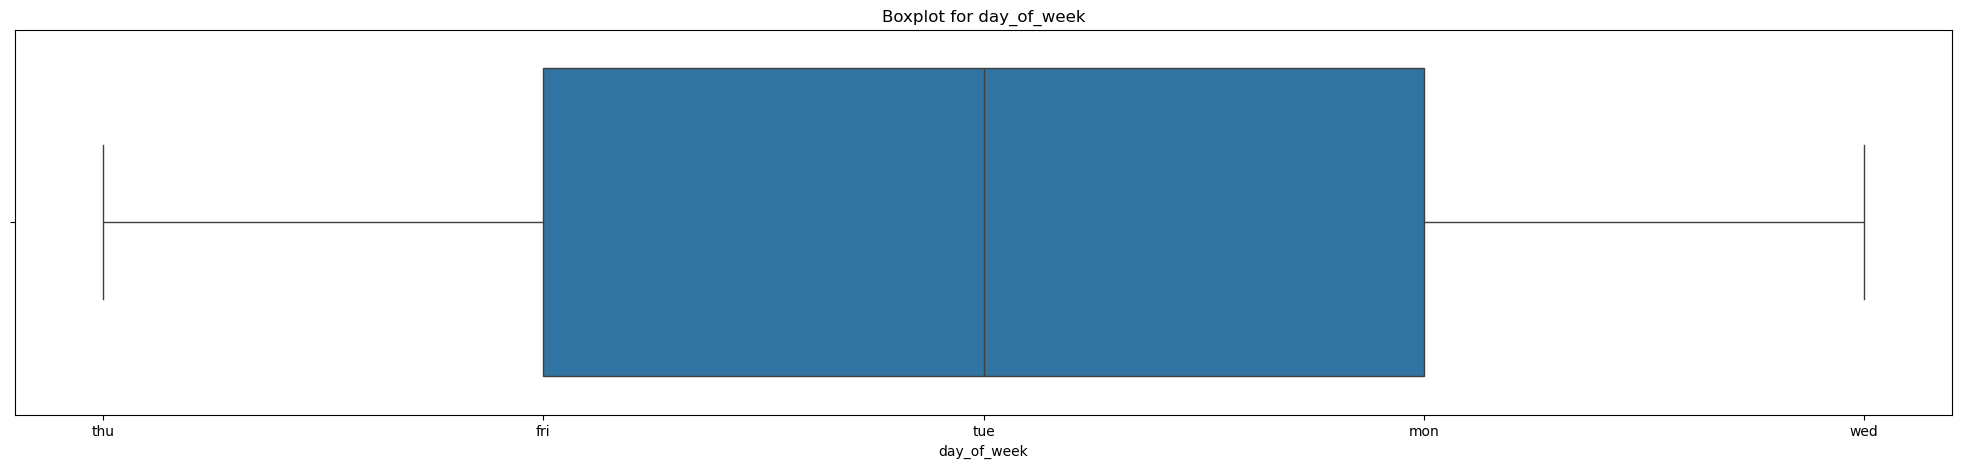

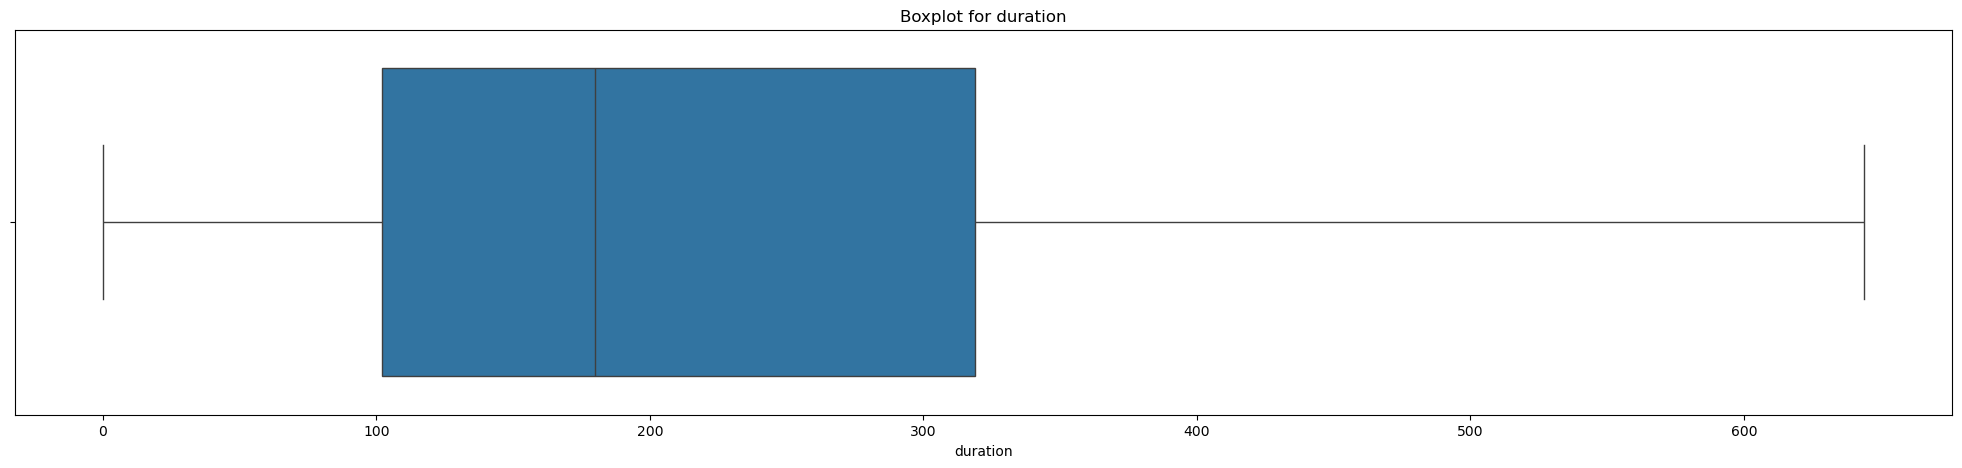

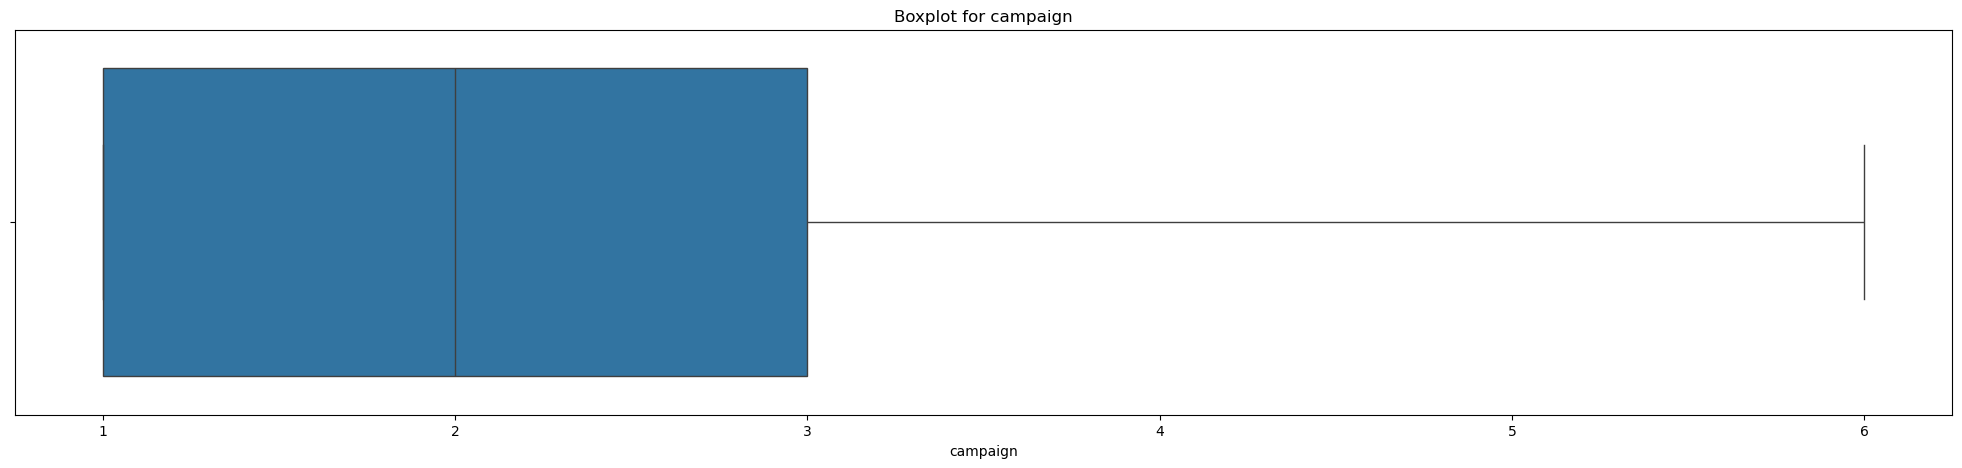

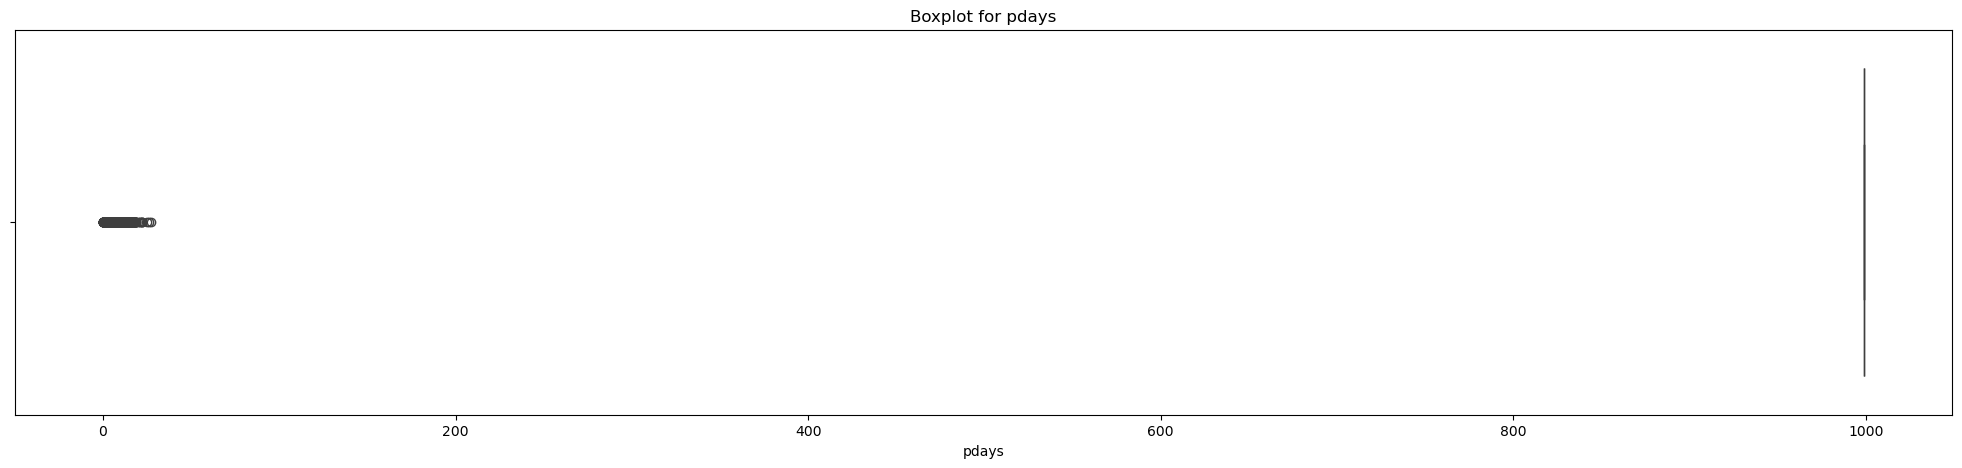

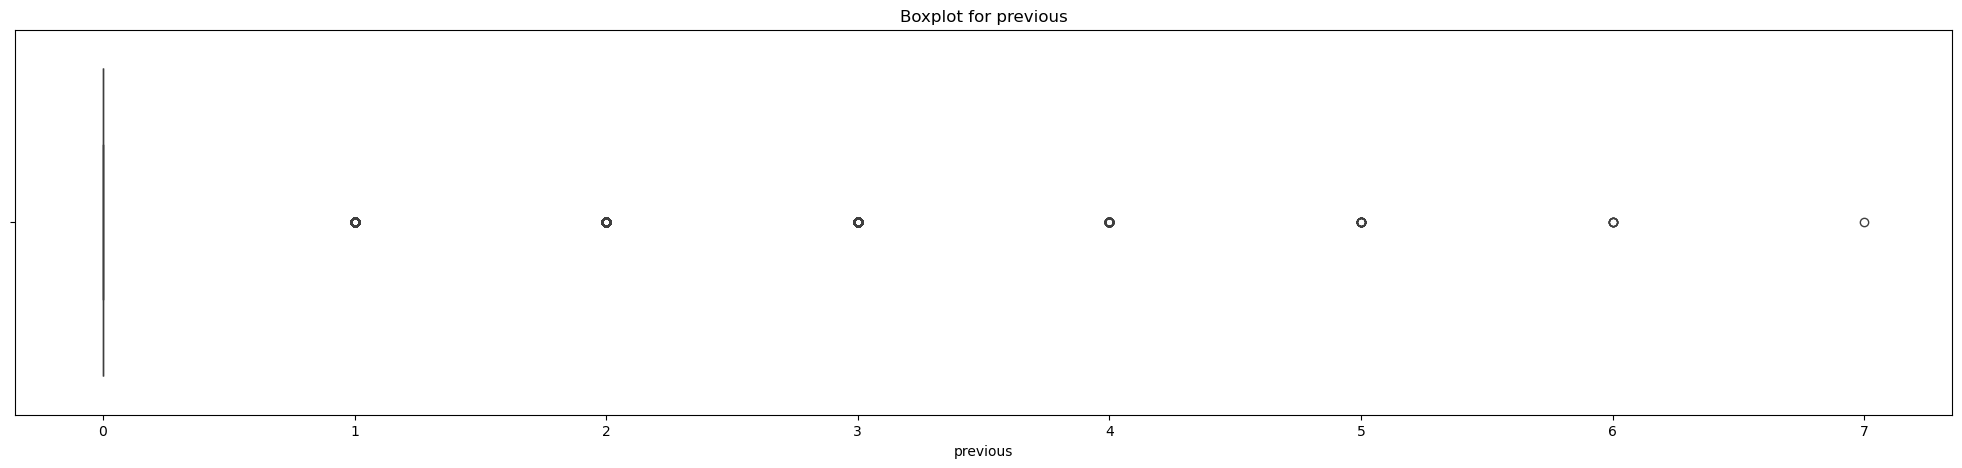

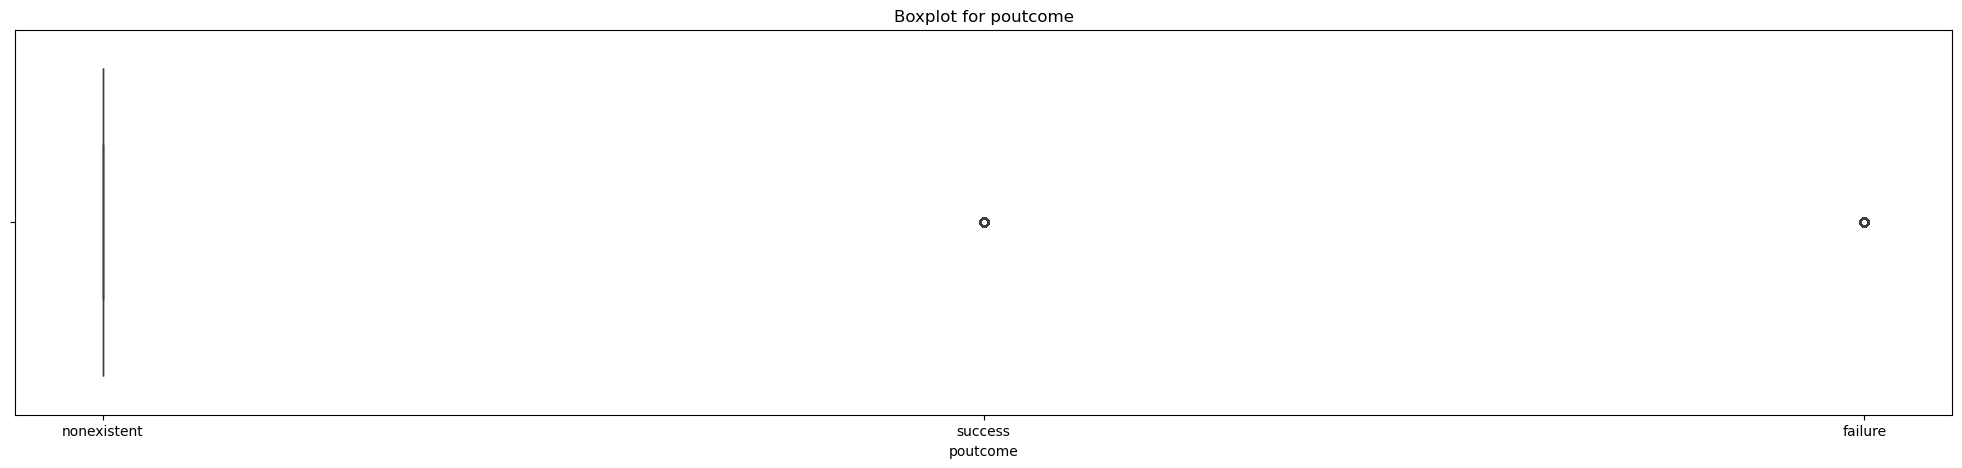

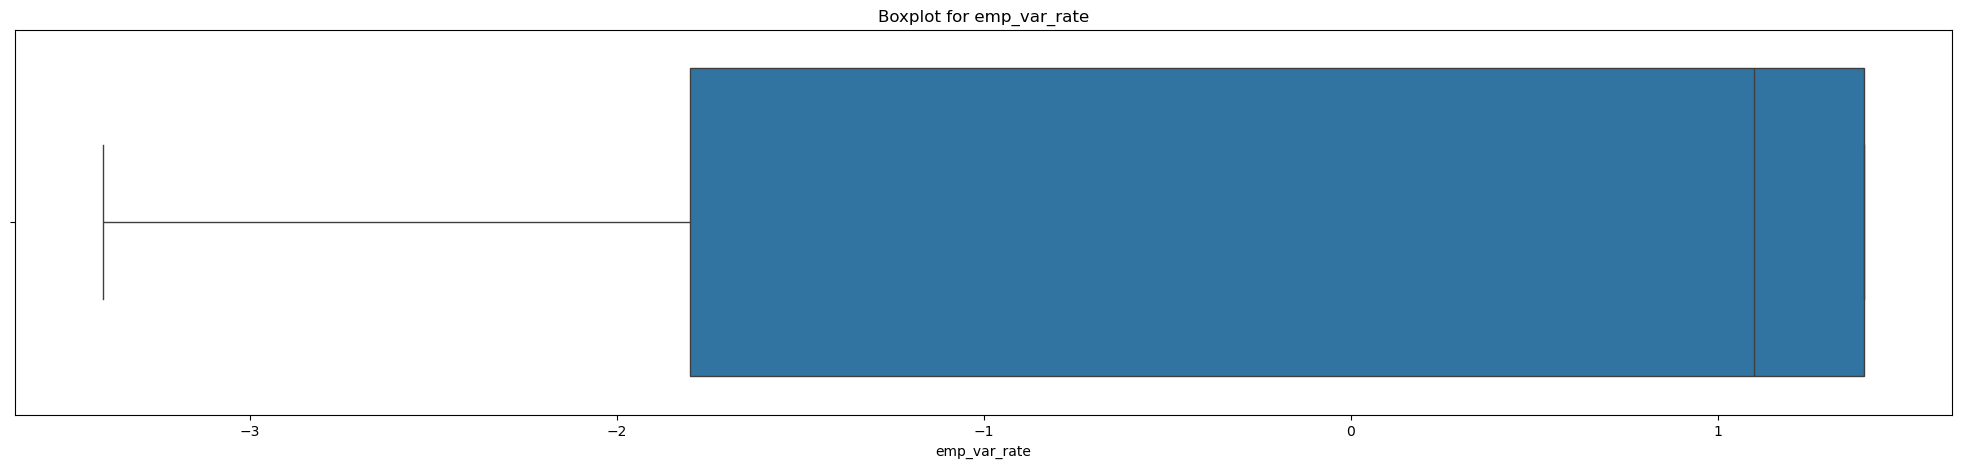

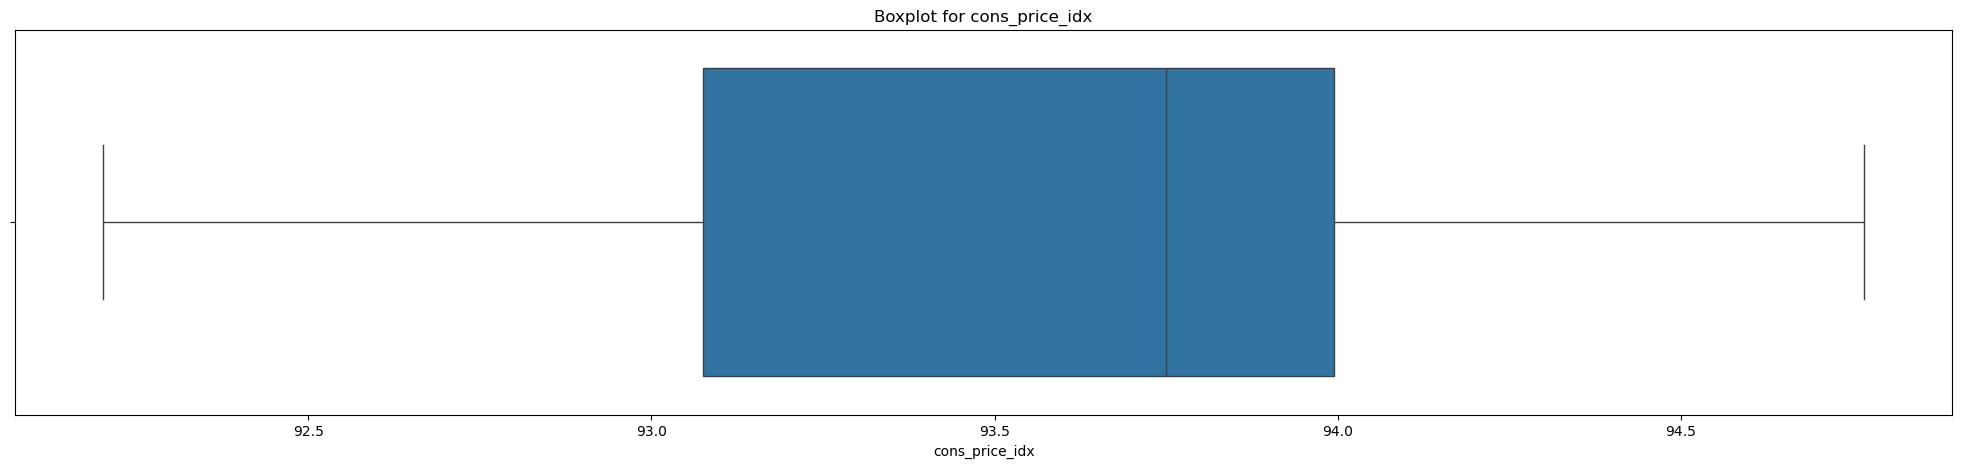

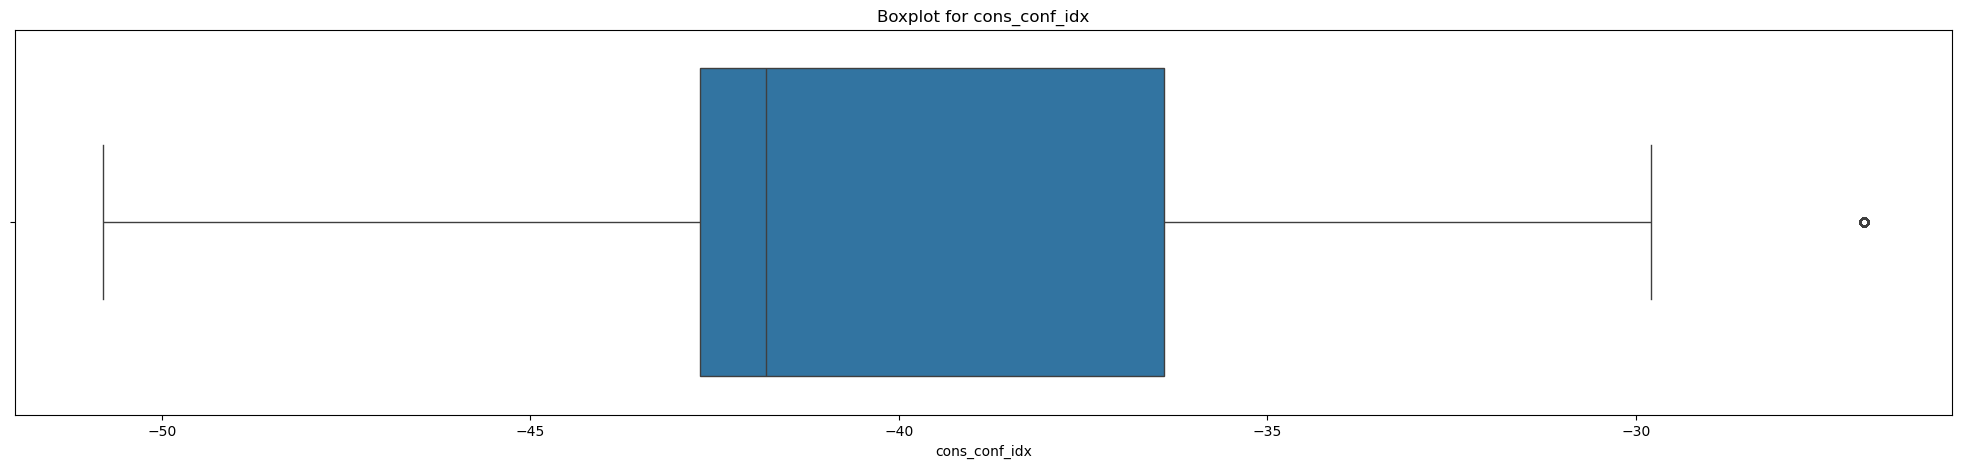

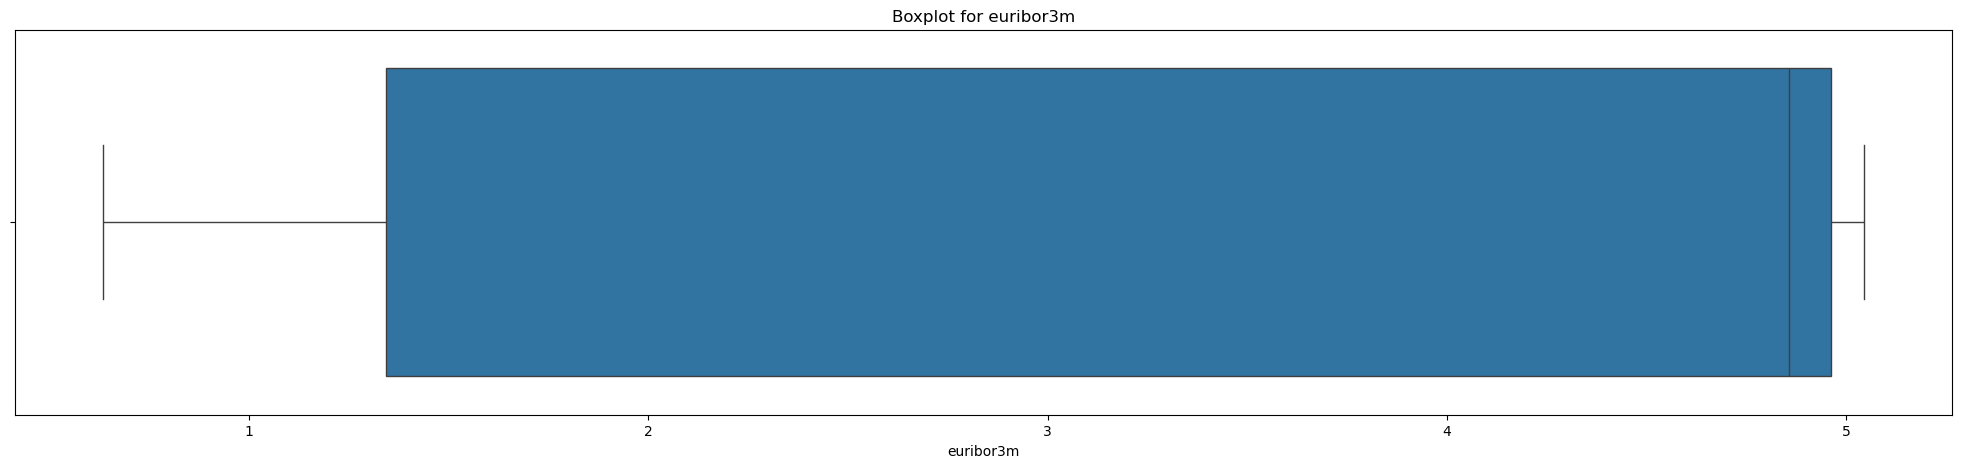

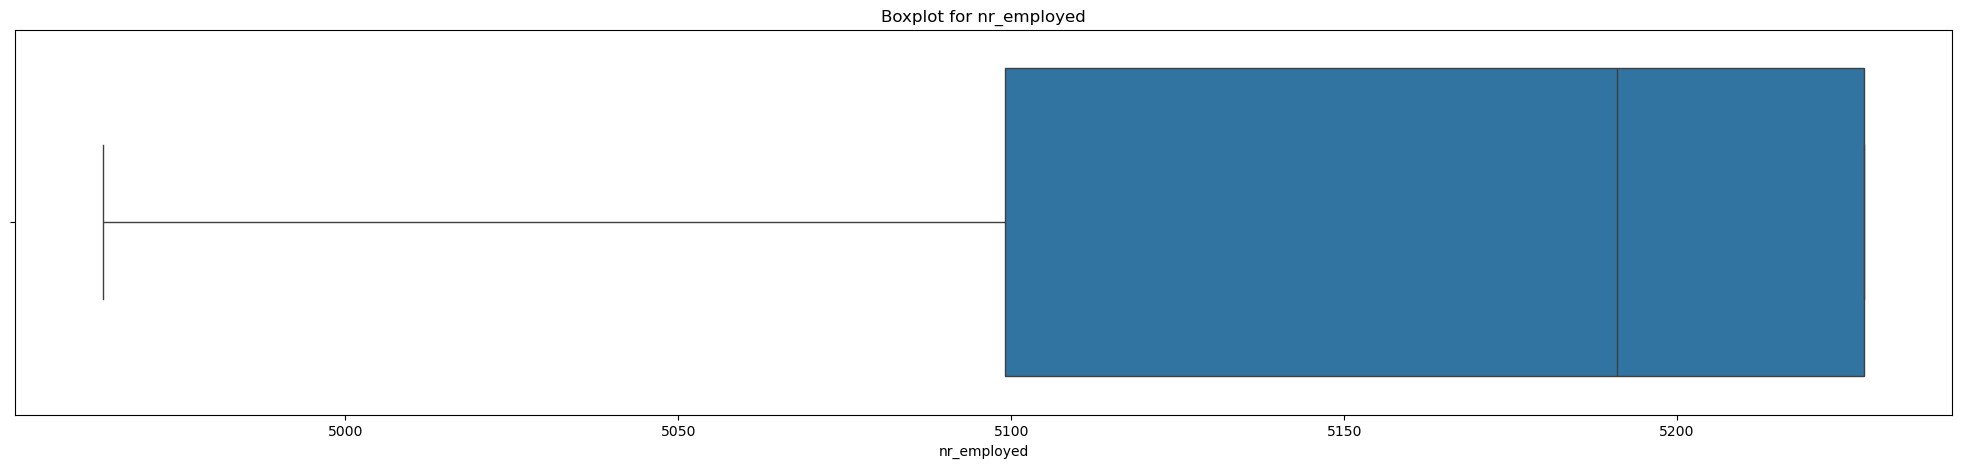

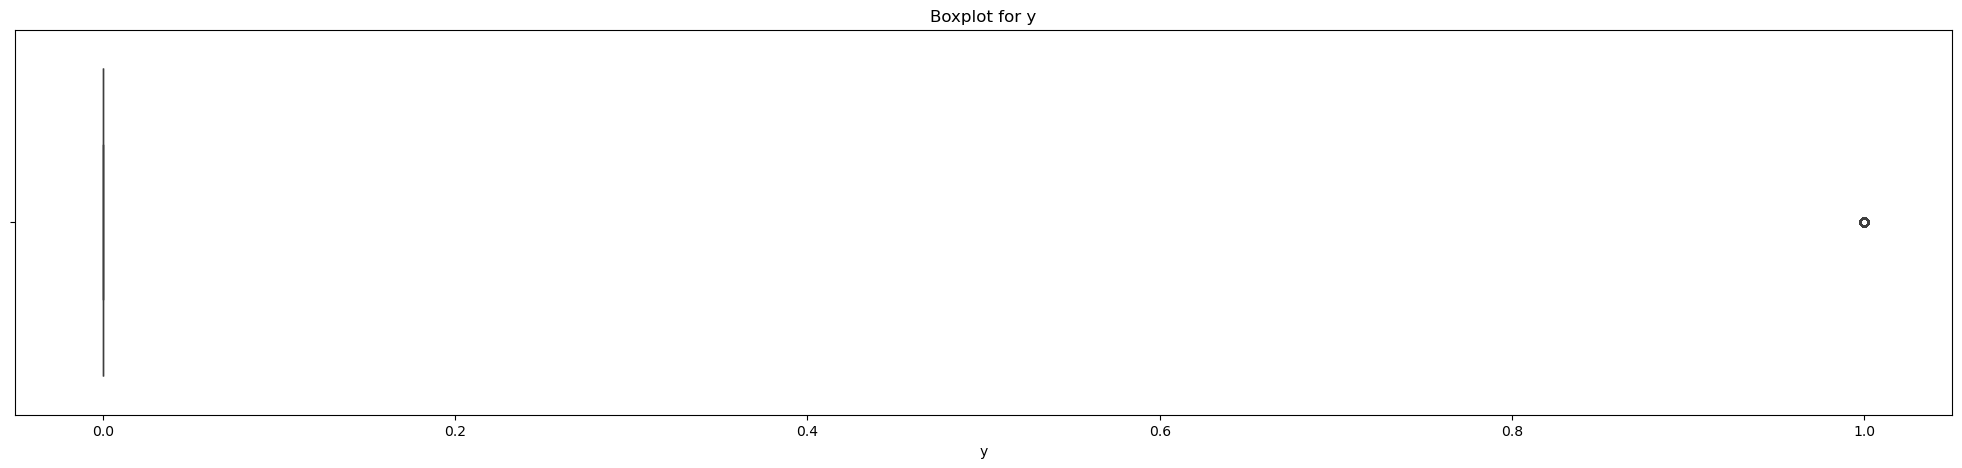

In [66]:
for i in bank.columns:
    plt.figure(figsize=(25, 5))  # Set the figure size
    sns.boxplot(x=bank[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [67]:
corr=bank.corr(numeric_only=True)

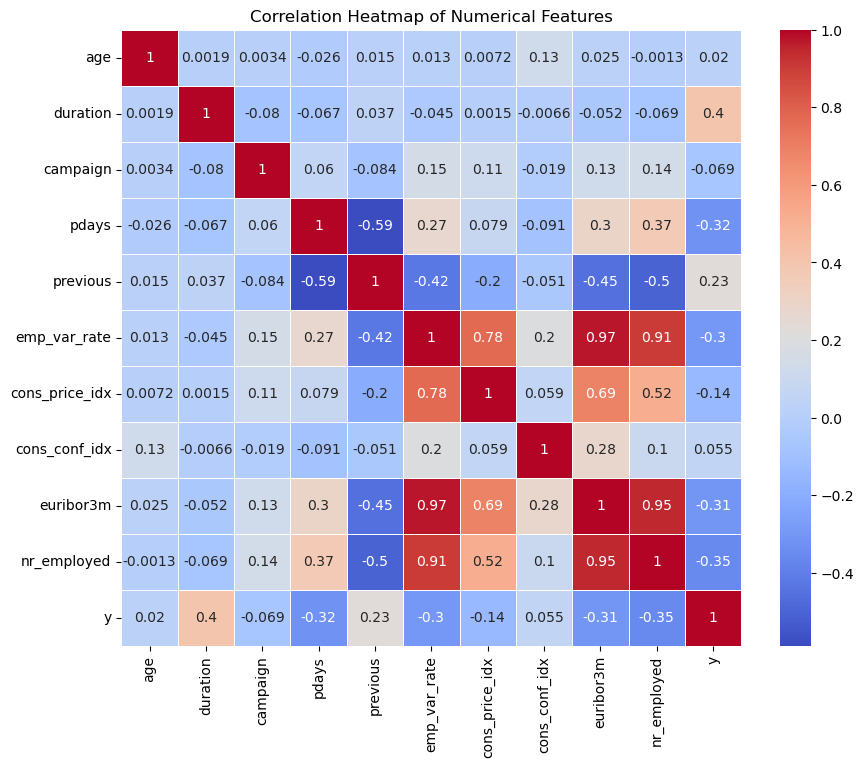

In [68]:
plt.figure(figsize=(10, 8))  
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [69]:
bank.drop(columns='pdays',inplace=True)

In [70]:
cat = list(bank.select_dtypes(include=['object']).columns)

In [71]:
bank = pd.get_dummies(data=bank,
                          columns=cat,
                          drop_first=True,
                          dtype=int
                      )
bank.sample(2)

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
15820,26,138,1,0,-2.9,92.201,-31.4,0.861,5076.2,0,...,0,0,0,0,1,0,0,0,1,0
28996,30,644,4,0,-0.1,93.200,-42.0,4.076,5195.8,0,...,0,1,0,0,0,1,0,0,1,0


In [72]:
bank.isnull().sum()

age                              0
duration                         0
campaign                         0
previous                         0
emp_var_rate                     0
cons_price_idx                   0
cons_conf_idx                    0
euribor3m                        0
nr_employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
marital_married                  0
marital_single                   0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
default_yes         

In [73]:
bank[bank.duplicated()].shape

(25, 47)

In [74]:
bank.drop_duplicates(inplace=True)

In [75]:
bank.nunique()

age                               53
duration                         645
campaign                           6
previous                           8
emp_var_rate                      10
cons_price_idx                    26
cons_conf_idx                     26
euribor3m                        316
nr_employed                       11
y                                  2
job_blue-collar                    2
job_entrepreneur                   2
job_housemaid                      2
job_management                     2
job_retired                        2
job_self-employed                  2
job_services                       2
job_student                        2
job_technician                     2
job_unemployed                     2
marital_married                    2
marital_single                     2
education_basic.6y                 2
education_basic.9y                 2
education_high.school              2
education_illiterate               2
education_professional.course      2
e

In [76]:
bank['y'].value_counts()

y
0    36532
1     4631
Name: count, dtype: int64

**imbalanced data**

# Modeling

In [77]:
x = bank.drop(columns=['y'])  
y = bank['y'] 

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [79]:
columns = x_train.columns

os = SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_resample(x_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])

print("Original y distribution:\n", y_train.value_counts())
print("Resampled y distribution:\n", os_data_y['y'].value_counts())


Original y distribution:
 y
0    29232
1     3698
Name: count, dtype: int64
Resampled y distribution:
 y
0    29232
1    29232
Name: count, dtype: int64


C:\Users\Saeed\AppData\Local\Temp\ipykernel_14244\3000161519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y',data=os_data_y, palette='hls')


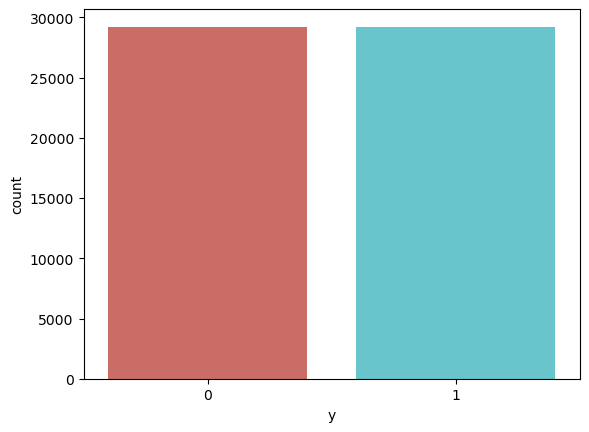

<Figure size 640x480 with 0 Axes>

In [80]:
sns.countplot(x='y',data=os_data_y, palette='hls')
plt.show()
plt.savefig('count_plot')

In [81]:
models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'saga']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20, 30, 40],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': [
            {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
            {'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
            {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4]}
        ]
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance']
        }
    }
}

best_models = {}

for model_name, config in models_params.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    random_search = RandomizedSearchCV(
        estimator=config['model'],
        param_distributions=config['params'],
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1,
        random_state=42,
        n_iter=10 
    )
    
    random_search.fit(os_data_X, os_data_y['y'])
    
    best_models[model_name] = {
        'best_model': random_search.best_estimator_,
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_
    }

for model_name, result in best_models.items():
    print(f"Best Model for {model_name}: {result['best_model']}")
    print(f"Best Parameters for {model_name}: {result['best_params']}")
    print(f"Best Score for {model_name}: {result['best_score']:.4f}\n")

Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning hyperparameters for SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning hyperparameters for KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Saeed\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Model for Logistic Regression: LogisticRegression(C=0.1, solver='liblinear')
Best Parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.1}
Best Score for Logistic Regression: 0.9128

Best Model for Decision Tree: DecisionTreeClassifier(max_depth=40, min_samples_split=5)
Best Parameters for Decision Tree: {'min_samples_split': 5, 'max_depth': 40}
Best Score for Decision Tree: 0.9229

Best Model for Random Forest: RandomForestClassifier(max_depth=30, n_estimators=50)
Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 30}
Best Score for Random Forest: 0.9358

Best Model for SVM: SVC(C=1000, kernel='poly')
Best Parameters for SVM: {'kernel': 'poly', 'degree': 3, 'C': 1000}
Best Score for SVM: 0.8787

Best Model for KNN: KNeighborsClassifier(n_neighbors=3, weights='distance')
Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 3}
Best Score for KNN: 0.9225



**Decision Tree i the best model with 93% accuracy**

C:\Users\Saeed\AppData\Local\Temp\ipykernel_14244\3639858492.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Best Score', y='Model', data=results_df, palette='coolwarm')


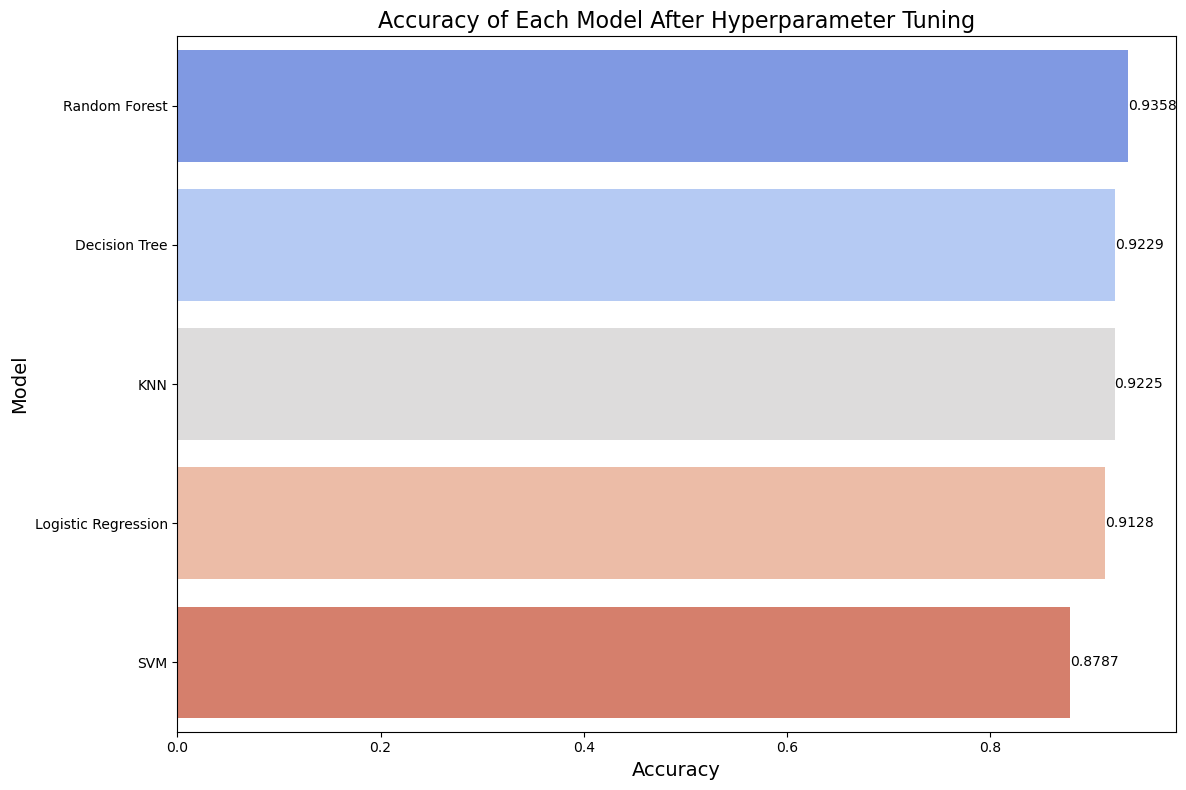

In [94]:
model_names = []
accuracy_scores = []

for model_name, result in best_models.items():
    model_names.append(model_name)
    accuracy_scores.append(result['best_score'])

results_df = pd.DataFrame({
    'Model': model_names,
    'Best Score': accuracy_scores
})

results_df = results_df.sort_values(by='Best Score', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Best Score', y='Model', data=results_df, palette='coolwarm')
ax.set_title('Accuracy of Each Model After Hyperparameter Tuning', fontsize=16)
ax.set_xlabel('Accuracy', fontsize=14)
ax.set_ylabel('Model', fontsize=14)

for i in ax.containers:
    ax.bar_label(i, fmt='%.4f')

plt.tight_layout()
plt.show()


In [101]:
model_scores = {}
for model_name, result in best_models.items():
    y_pred = result['best_model'].predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_scores[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


Performance Metrics for Logistic Regression:
Accuracy: 0.8845
Precision: 0.4915
Recall: 0.5563
F1 Score: 0.5219

Performance Metrics for Decision Tree:
Accuracy: 0.8830
Precision: 0.4846
Recall: 0.5048
F1 Score: 0.4945

Performance Metrics for Random Forest:
Accuracy: 0.8986
Precision: 0.5524
Recall: 0.5541
F1 Score: 0.5532

Performance Metrics for SVM:
Accuracy: 0.8511
Precision: 0.4237
Recall: 0.8725
F1 Score: 0.5704

Performance Metrics for KNN:
Accuracy: 0.8460
Precision: 0.4028
Recall: 0.7438
F1 Score: 0.5226


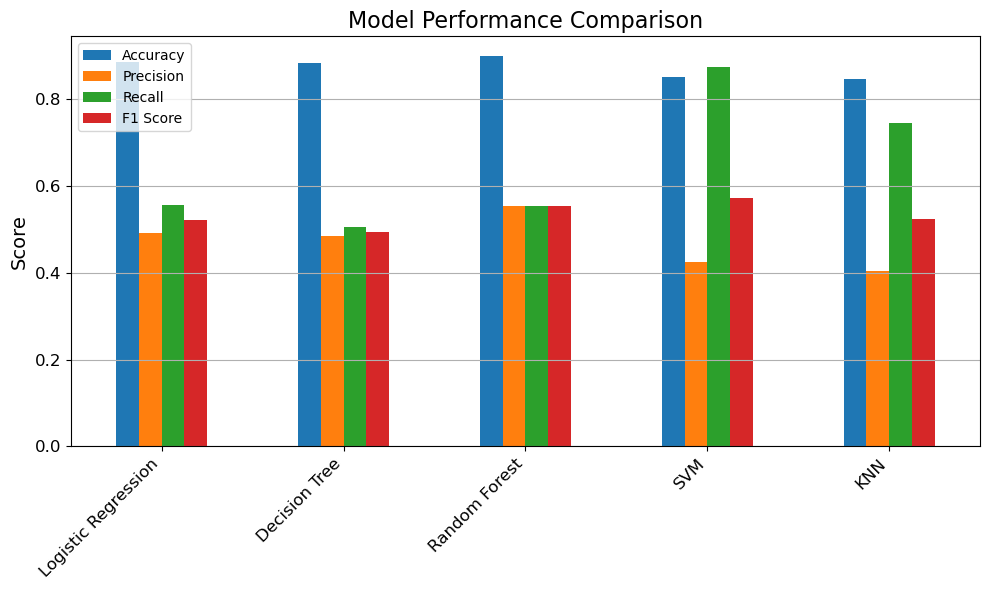

In [102]:
for model_name, scores in model_scores.items():
    print(f"\nPerformance Metrics for {model_name}:")
    for metric, score in scores.items():
        print(f"{metric}: {score:.4f}")

metrics_df = pd.DataFrame(model_scores).T

metrics_df.plot(kind='bar', figsize=(10, 6))

plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()
